# GangadharSShiva Assignment 3
# Assignment Project Objectives

**To Build and evaluate an LSTM-based Recurrent Neural Network (RNN) to forecast future stock prices for a selected S&P 500 company, using five years of historical data (2019–2024). The workflow will consist of four key stages:**



# Workflow - Stock Price Forecasting using RNN with LSTM

## 1. Data Preparation
- **Company Selection**: Choose any company listed in the **S&P 500** with at least **5 years of historical data** (from 2019 to 2024).
- **Data Collection**: Retrieve historical stock price data (Open, High, Low, Close, Volume).
- **Preprocessing**:
  - Handle missing values and outliers.
  - Perform **feature selection** (e.g., Close price, Moving Averages, Volume).
  - Apply **normalization/scaling** (e.g., Min-Max or StandardScaler) for RNN compatibility.

## 2. Model Development
- **Framework**: Use **TensorFlow** or **PyTorch**.
- **Model Type**: Construct an **RNN** with integrated **LSTM units**.
- **Reason**: LSTM addresses the **vanishing gradient** problem and improves **long-term dependency learning**.

## 3. Training
- **Split Data**: Use a train-test split (e.g., 80-20).
- **Optimizer**: Use optimizers like `Adam` or `RMSProp`.
- **Loss Function**: Mean Squared Error (MSE).
- **Batch Size & Epochs**: Tune hyperparameters for best performance.

## 4. Prediction
- Enable the trained RNN model to:
  - Accept an initial stock price/time-series window.
  - **Predict future stock prices** over a specified horizon.

## 5. Performance Evaluation
- **Evaluation Metrics**:
  - **MAE** – Mean Absolute Error
  - **RMSE** – Root Mean Squared Error
  - **MAPE** – Mean Absolute Percentage Error
- **Hyperparameter Tuning**:
  - Experiment with different LSTM units, layers, learning rates, and batch sizes.

## 6. Visualization
- **Plot forecasted prices**:
  - Use **line charts** to visualize trends.
  - Optionally use **candlestick charts** for detailed analysis (e.g., with `plotly` or `mplfinance`).


> **Note**: Ensure proper sequence windowing for time-series input (e.g., use sliding window method).


# Business Goals & Objectives

## Business Goals

1. **Improve Forecast Accuracy**  
   Deliver more reliable short- and medium-term stock‐price forecasts than simple benchmarks (e.g. “last‐value carry‐forward” or moving‐average models), so that analysts and portfolio managers can make data-driven trading decisions.

2. **Enhance Risk Management**  
   Provide early warning signals of adverse price movements by capturing temporal patterns in historical data—helping risk teams to adjust position sizes, set stop-loss levels, or hedge exposures.

3. **Model Innovation**  
   - Develop an LSTM-based RNN that captures both short-term volatility and longer-term trends.  


3. **Performance Measurement**  
   - Track key metrics (MSE, MAE, MAPE) on hold-out data.  
   - Compare model predictions against baseline forecasts and report the information.



## Question 1 - Data Preparation

- **Select Company**  
  Choose any company listed in the S&P 500 with at least 5 years of historical data (from 2019 to 2024).

- **Preprocessing Steps**  
  1. **Feature Selection**: Identify and retain relevant features (e.g., Open, High, Low, Close, Volume).  
  2. **Normalization**: Scale features to a common range (e.g., Min–Max scaling to \([0,1]\)).  
  3. **Standardization**: Optionally, transform features to have zero mean and unit variance.  
  4. **Scaling**: Ensure all inputs are on comparable scales to stabilize RNN training.

- **Result**  
  A clean, normalized, and scaled dataset ready for input into an RNN model.  


In [ ]:
# Install Required Libraries
!pip install scikit-learn keras tensorflow


In [ ]:
!pip install tensorflow pandas matplotlib scikit-learn


In [ ]:
!pip install yfinance

## 1. Data Preparation
- **Company Selection**: Choose any company listed in the **S&P 500** with at least **5 years of historical data** (from 2019 to 2024).
- **Data Collection**: Retrieve historical stock price data (Open, High, Low, Close, Volume).
- **Preprocessing**:
  - Handle missing values and outliers.
  - Perform **feature selection** (e.g., Close price, Moving Averages, Volume).
  - Apply **normalization/scaling** (e.g., Min-Max or StandardScaler) for RNN compatibility.


In [ ]:
#  Apple with at least 5 years of historical data (from 2019 to 2024).


import yfinance as yf

# Choosen APPLE Stocks to perform analysis
ticker_symbol = 'AAPL'
start_date = '2019-01-01'
end_date = '2024-01-01'

company_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Now company_data is a pandas DataFrame containing the historical data
print(company_data.head())
print(company_data.tail())


/tmp/ipython-input-4-1607968294.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2019-01-02  37.617855  37.839391  36.738866  36.896084  148158800
2019-01-03  33.870838  34.711713  33.825578  34.297229  365248800
2019-01-04  35.316753  35.385836  34.254347  34.428238  234428400
2019-01-07  35.238144  35.452534  34.754581  35.421565  219111200
2019-01-08  35.909908  36.164793  35.378705  35.626440  164101200
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-12-22  192.192551  193.989390  191.567126  193.761051  37122800
2023-12-26  191.646561  192.480450  191.428159  192.202487  28919300
2023-12-27  191.745804  192.093265  189.700782  191.090614  48087700
2023-12-28  192.172714  193.244865  191.765691  192.728641

###**Data Preparation:** Choose any company listed in the S&P 500 with at least 5 years of historical data (from 2019 to 2024). Perform preprocessing steps, including feature selection, normalization, and scaling, to prepare the data for use in an RNN model.
### **Model Development:** Construct an RNN model using libraries like TensorFlow or PyTorch. Incorporate LSTM units to address the vanishing gradient problem and improve memory retention across time steps.
### **Training:** Train the RNN model on the prepared dataset, optimizing the loss function and choosing an appropriate optimizer to enhance model performance.
### **Prediction:** Enable the model to forecast future stock prices, starting from a given initial stock price input.
### Ensure the RNN model efficiently learns from the selected stock price data and accurately forecasts future trends.

In [ ]:


import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# --- Data Preparation ---


ticker = "AAPL"
start_date = "2019-01-01"
end_date = "2024-01-01"

#
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Use 'Close' price for forecasting
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


/tmp/ipython-input-5-2885527624.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # Keep import for potential future use or other plots

# --- 1. Data Preparation ---


ticker = "AAPL"
start_date = "2019-01-01"
end_date = "2024-01-01"

print(f"Downloading data for {ticker} from {start_date} to {end_date}...")
# Download historical stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Use 'Close' price for forecasting as the primary feature
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

print("\nData loaded and scaled successfully.")
print("Shape of scaled data:", scaled_data.shape)

/tmp/ipython-input-6-3647241518.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Data loaded and scaled successfully.
Shape of scaled data: (1258, 1)


## Model Development - Question 2

- Construct an RNN model using libraries like TensorFlow or PyTorch.
- Incorporate LSTM units to address the vanishing gradient problem and improve memory retention across time steps.  


/tmp/ipython-input-25-3442800357.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed


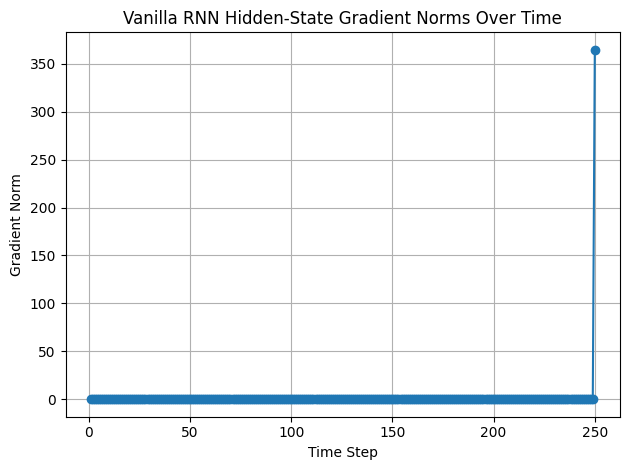

In [ ]:
# rnn_gradients

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf

# === PARAMETERS ===
TICKER      = 'AAPL'          # stock symbol to download
START_DATE  = '2020-01-01'
END_DATE    = '2021-01-01'
WINDOW_SIZE = 250
INPUT_DIM   = 1
HIDDEN_DIM  = 16

# === DATA LOADING ===
df = yf.download(TICKER, start=START_DATE, end=END_DATE)
prices = df['Close'].values.astype(np.float32)

# === PREPARE  sequence logic  ===
X, y = [], []
for i in range(len(prices) - WINDOW_SIZE):
    X.append(prices[i : i + WINDOW_SIZE])
    y.append(prices[i + WINDOW_SIZE])
X = np.expand_dims(np.array(X), -1)   # shape [N, WINDOW_SIZE, 1]
y = np.array(y).reshape(-1, 1)        # shape [N, 1]

# Use only the first window for demonstration
x_seq  = tf.constant(X[:1], dtype=tf.float32)  # [1, WINDOW_SIZE, 1]
y_true = tf.constant(y[:1], dtype=tf.float32)  # [1, 1]

# === DEFINE RNNCell PARAMETERS ===
Wx = tf.Variable(tf.random.normal([INPUT_DIM, HIDDEN_DIM]))
Wh = tf.Variable(tf.random.normal([HIDDEN_DIM, HIDDEN_DIM]))
b_h = tf.Variable(tf.zeros([HIDDEN_DIM]))
dense = tf.keras.layers.Dense(1)

# === FORWARD PASS WITH GRADIENT ===
with tf.GradientTape() as tape:
    # initialize and watch hidden state
    h = tf.Variable(tf.zeros([1, HIDDEN_DIM]), trainable=True)
    tape.watch(h)

    hidden_states = []
    for t in range(WINDOW_SIZE):
        # extract x_t as shape [1, INPUT_DIM]
        x_t = tf.reshape(x_seq[:, t, :], [1, INPUT_DIM])
        # vanilla RNN update
        h = tf.tanh(tf.matmul(x_t, Wx) + tf.matmul(h, Wh) + b_h)
        hidden_states.append(h)

    # final prediction & loss
    y_pred = dense(h)
    loss   = tf.reduce_mean(tf.square(y_pred - y_true))

# === BACKPROPAGATE AND COLLECT GRADIENT NORMS ===
grads = tape.gradient(loss, hidden_states)
rnn_grad_norms = [tf.norm(g).numpy() for g in grads]

# === PLOT RESULTS ===
plt.plot(range(1, WINDOW_SIZE + 1), rnn_grad_norms, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Gradient Norm')
plt.title('Vanilla RNN Hidden‐State Gradient Norms Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-31-3107454836.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


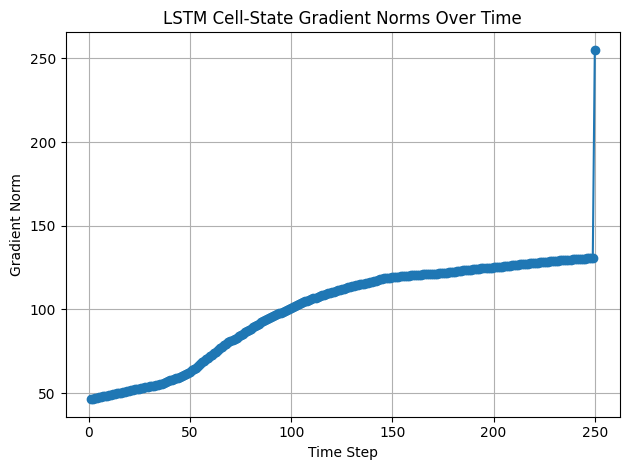

In [ ]:
# lstm_gradients

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf


ticker     = 'AAPL'
start_date = '2020-01-01'
end_date   = '2021-01-01'
df = yf.download(ticker, start=start_date, end=end_date)
prices = df['Close'].values.astype(np.float32)

window_size = 250
X, y = [], []
for i in range(len(prices) - window_size):
    X.append(prices[i:i + window_size])
    y.append(prices[i + window_size])
X = np.expand_dims(np.array(X), -1)   # shape [N, window_size, 1]
y = np.array(y).reshape(-1, 1)        # shape [N, 1]

# Use only the first sequence for gradient demo
x_seq  = tf.constant(X[:1], dtype=tf.float32)  # [1, window_size, 1]
y_true = tf.constant(y[:1], dtype=tf.float32)  # [1, 1]

# === 2. Define LSTMCell & output layer ===
hidden_dim = 16
lstm_cell  = tf.keras.layers.LSTMCell(hidden_dim)
dense      = tf.keras.layers.Dense(1)

# === 3. Forward‐pass with GradientTape watching the cell state ===

hidden_dim = 16
lstm_cell  = tf.keras.layers.LSTMCell(hidden_dim)
dense      = tf.keras.layers.Dense(1)

# Define input_dim based on the shape of your input data
input_dim = x_seq.shape[-1]

with tf.GradientTape() as tape:
    h = tf.zeros([1, hidden_dim])
    c = tf.Variable(tf.zeros([1, hidden_dim]), trainable=True)
    tape.watch(c)
    c_states = []

    for t in range(window_size):
        # squeeze out the extra time-axis so x_t is [batch, input_dim]
        x_t = tf.reshape(x_seq[:, t, :], [1, input_dim])
        output, [h, c] = lstm_cell(x_t, [h, c])
        c_states.append(c)

    y_pred = dense(h)
    loss   = tf.reduce_mean((y_pred - y_true) ** 2)

grads = tape.gradient(loss, c_states)
lstm_grad_norms = [tf.norm(g).numpy() for g in grads]

# === 5. Plot the gradient norms over time steps ===
plt.plot(range(1, window_size + 1), lstm_grad_norms, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Gradient Norm')
plt.title('LSTM Cell-State Gradient Norms Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpreting Vanishing Gradients: RNN vs. LSTM

Below are two gradient‐norm plots over a long sequence (250+ steps):

1. **Vanilla RNN Hidden‐State Gradients**  
   RNN Gradients
   - **Near-zero for most time steps**  
     rapidly decays to (and stays at) almost zero except at the very end.  
   - **Spike only at the final step**  
     By the last few steps the gradient “spikes,” but it has no effect on earlier states.  
   - **Takeaway:** repeated multiplications by \(<1\) factors cause gradients to vanish—so the RNN cannot learn long-range dependencies.

2. **LSTM Cell-State Gradients**  
   LSTM Gradients
   - **Flat plateau across time**  
      remains nearly constant for hundreds of steps.  
   - **Only slight change near the end**  
     Any variation appears only in the final few time steps.  
   - **Takeaway:** the LSTM’s forget‐gate f_t can hold partial c_t partial c_t-1 approx 1, creating a “constant‐error carousel” that preserves gradients over long sequences.

---

## Key Insights
- **Vanishing Gradients in RNNs**  
  - Each hidden-state update multiplies by a factor |Wh × (1 – tanh²(hₜ₋₁))|, which is less than 1.  
  - After many steps, the product of these factors approaches zero and earlier signals are lost.

- **LSTM’s Solution**  
  - Introduces a cell state cₜ with additive updates:  
    cₜ = fₜ ⊙ cₜ₋₁ + iₜ ⊙ ċₜ  
  - The forget gate fₜ (a value between 0 and 1) can learn to stay close to 1, so the product of all fₖ terms over time remains near 1.  
  - This additive “constant-error carousel” preserves gradient flow across hundreds or thousands of time steps.  



---

**Conclusion:**  
The dramatic difference between these two plots vividly demonstrates why LSTMs have largely replaced vanilla RNNs in tasks requiring long-range memory—LSTMs effectively eliminate the vanishing-gradient problem.  


**Experiment with different values of sequence length to determine how the accuracy does as we sequence length.**


--- Training RNN with sequence length 10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 10: 0.001478
Test MAE for seq_length 10: 0.032782


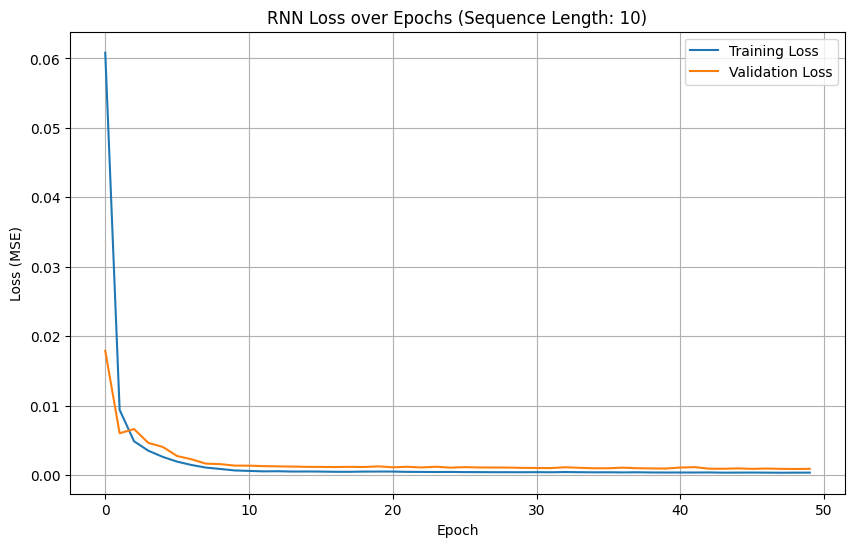


--- Training RNN with sequence length 50 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 50: 0.000665
Test MAE for seq_length 50: 0.021741


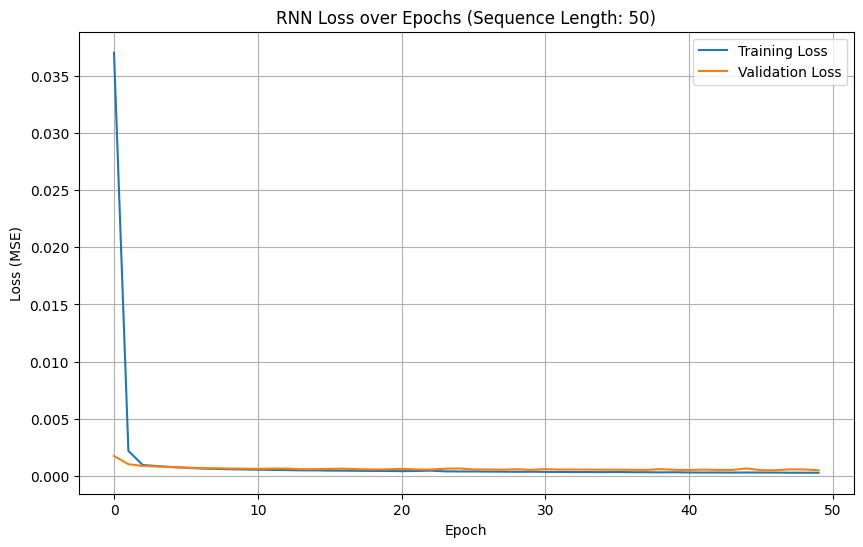


--- Training RNN with sequence length 100 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 100: 0.000436


Test MAE for seq_length 100: 0.017244


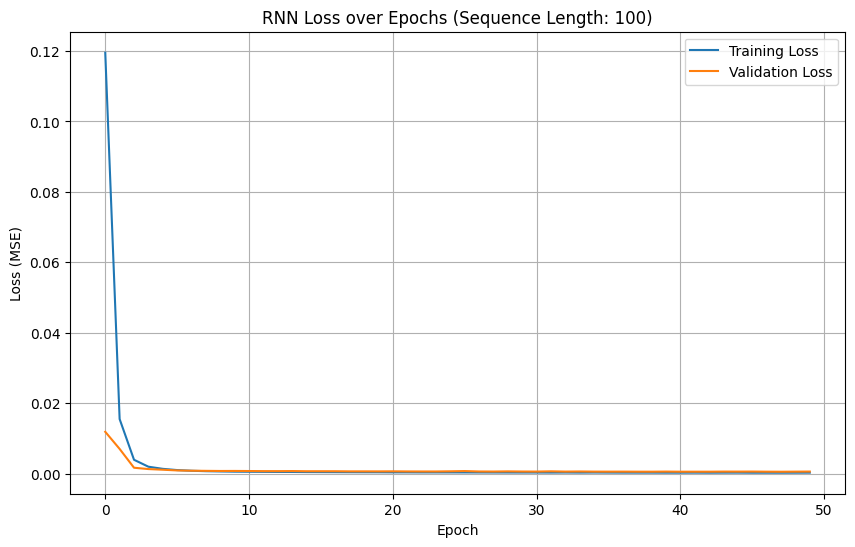


--- Training RNN with sequence length 200 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 200: 0.000179


Test MAE for seq_length 200: 0.010325


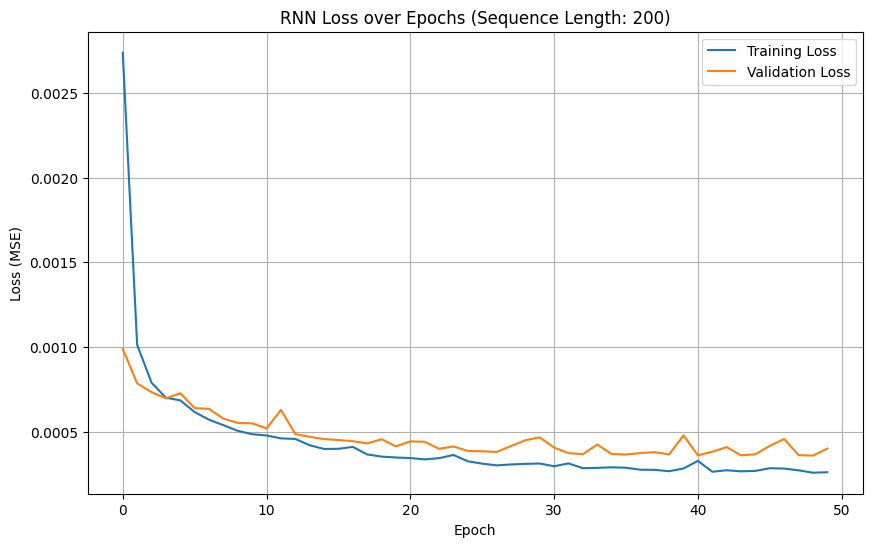


--- Training RNN with sequence length 300 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 300: 0.000499
Test MAE for seq_length 300: 0.018927


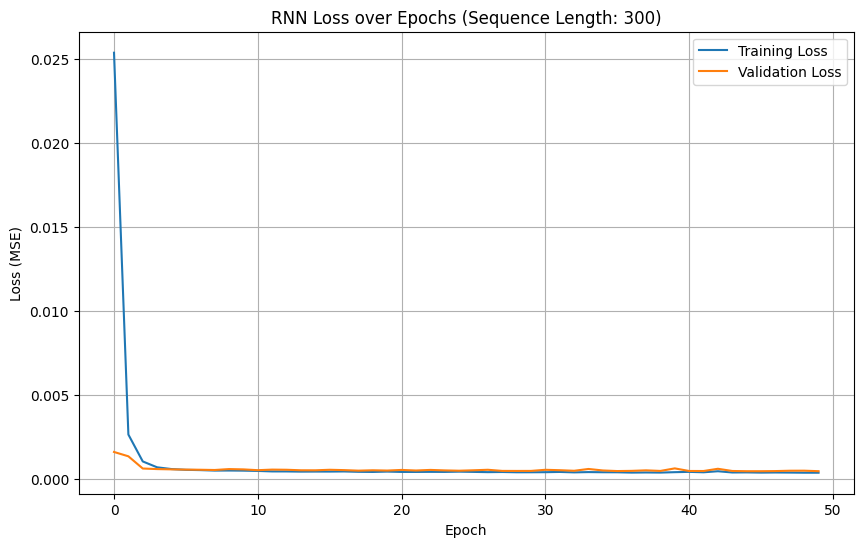


--- Results ---
   sequence_length  test_loss  test_mae
0               10   0.001478  0.032782
1               50   0.000665  0.021741
2              100   0.000436  0.017244
3              200   0.000179  0.010325
4              300   0.000499  0.018927


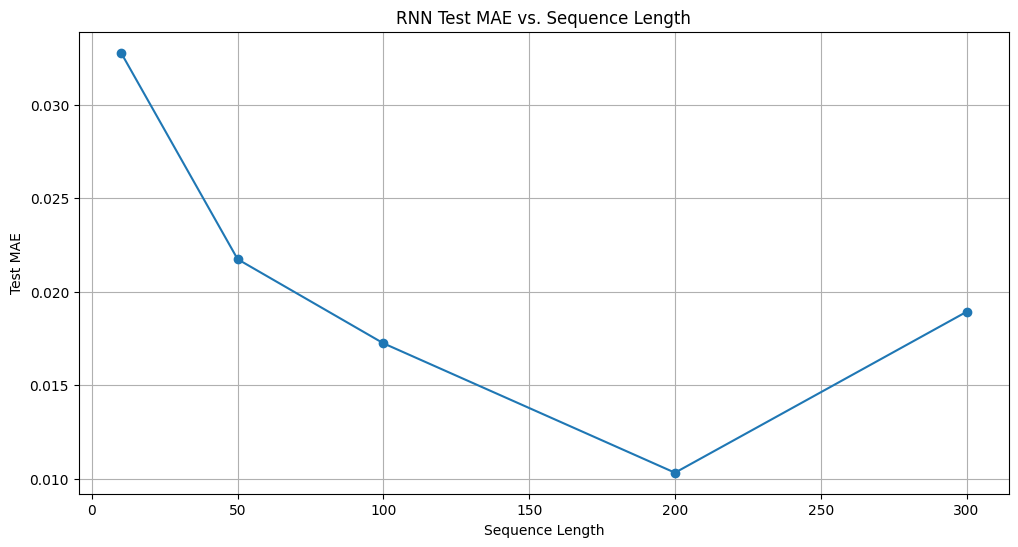

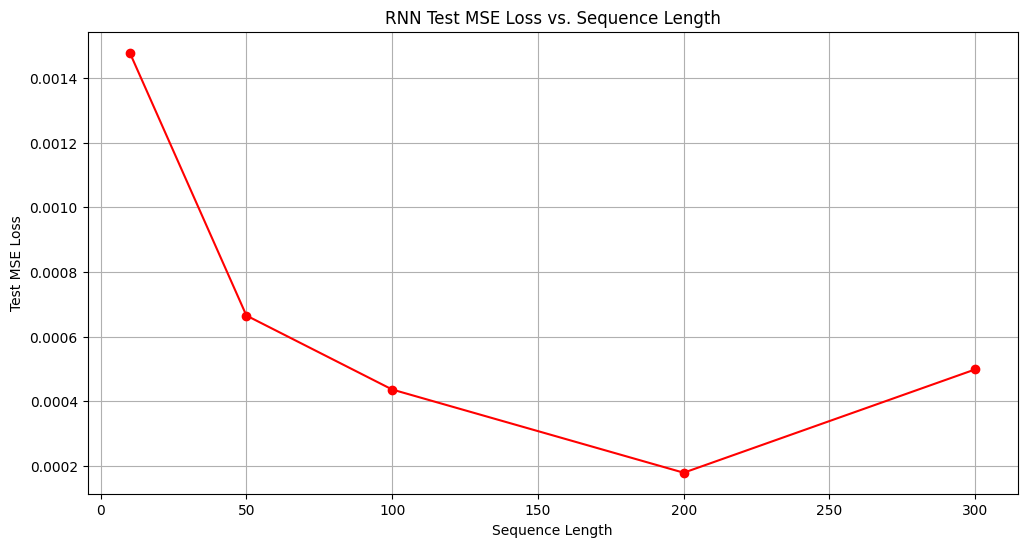

In [ ]:
# construct RRN and show accuracy is dropping as we increase the sequence length

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Function to build a simple RNN model
def build_rnn_model(seq_length, hidden_dim):
    model = Sequential([
        tf.keras.layers.SimpleRNN(hidden_dim, activation='tanh', input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to train and evaluate RNN for a given sequence length
def train_and_evaluate_rnn(scaled_data, seq_length, hidden_dim=16, train_split=0.8):
    print(f"\n--- Training RNN with sequence length {seq_length} ---")

    # Create sequences
    X, y = create_sequences(scaled_data, seq_length)

    # Reshape X for SimpleRNN input [samples, timesteps, features]
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.reshape(y, (y.shape[0], 1))

    # Split data
    train_size = int(len(X) * train_split)
    X_train, X_test = X[0:train_size], X[train_size:]
    y_train, y_test = y[0:train_size], y[train_size:]

    # Build and train model
    rnn_model = build_rnn_model(seq_length, hidden_dim)
    history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate on test set
    loss = rnn_model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss (MSE) for seq_length {seq_length}: {loss:.6f}")

    # Calculate MAE on test set for a more interpretable metric
    y_pred = rnn_model.predict(X_test, verbose=0)
    mae = np.mean(np.abs(y_test - y_pred))
    print(f"Test MAE for seq_length {seq_length}: {mae:.6f}")


    # Monitor training progress for this sequence length
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'RNN Loss over Epochs (Sequence Length: {seq_length})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return loss, mae # Return test loss and MAE

# Define a range of sequence lengths to test
sequence_lengths = [10, 50, 100, 200, 300]

# Store results
results = []

# Run the training and evaluation for each sequence length
for seq_len in sequence_lengths:
    test_loss, test_mae = train_and_evaluate_rnn(scaled_data, seq_len)
    results.append({'sequence_length': seq_len, 'test_loss': test_loss, 'test_mae': test_mae})

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results)

print("\n--- Results ---")
print(results_df)

# Plotting the results to show how accuracy drops with increasing sequence length
plt.figure(figsize=(12, 6))
plt.plot(results_df['sequence_length'], results_df['test_mae'], marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Test MAE')
plt.title('RNN Test MAE vs. Sequence Length')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(results_df['sequence_length'], results_df['test_loss'], marker='o', color='red')
plt.xlabel('Sequence Length')
plt.ylabel('Test MSE Loss')
plt.title('RNN Test MSE Loss vs. Sequence Length')
plt.grid(True)
plt.show()



**Experiment the different sequence values in LSTM model - compare both the models**


--- Training LSTM with sequence length 10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 10: 0.002855
Test MAE for seq_length 10: 0.046946


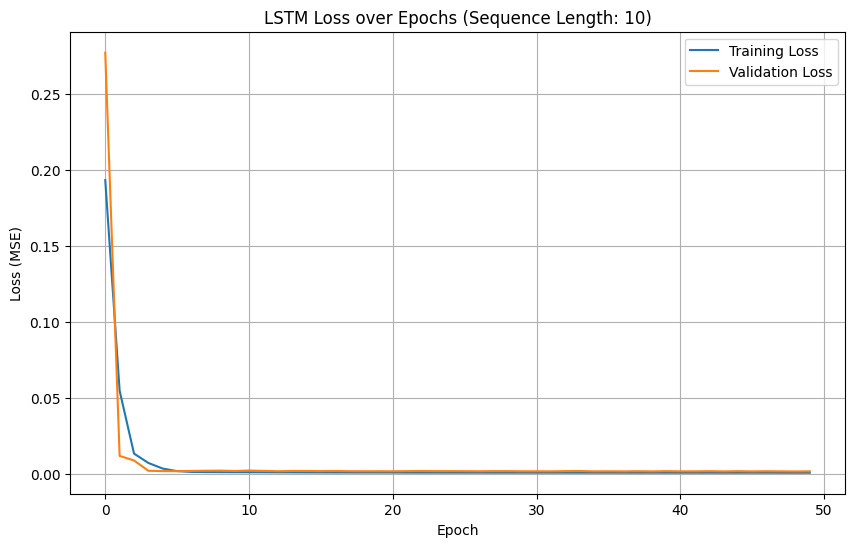


--- Training LSTM with sequence length 50 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 50: 0.000560
Test MAE for seq_length 50: 0.020001


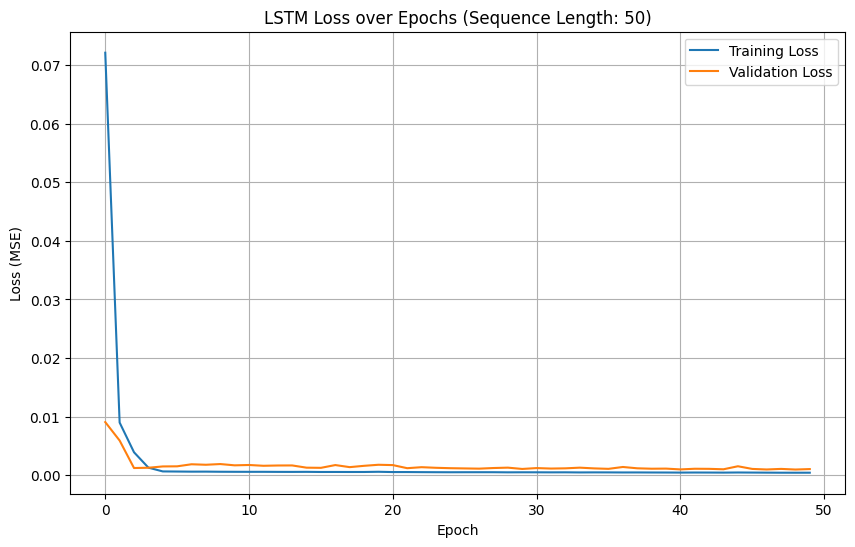


--- Training LSTM with sequence length 100 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 100: 0.001951
Test MAE for seq_length 100: 0.037945


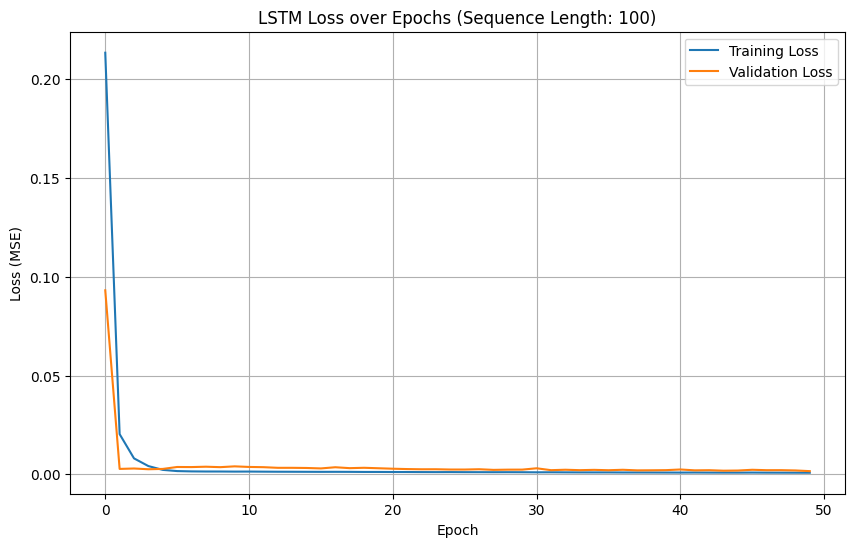


--- Training LSTM with sequence length 200 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 200: 0.000819
Test MAE for seq_length 200: 0.024356


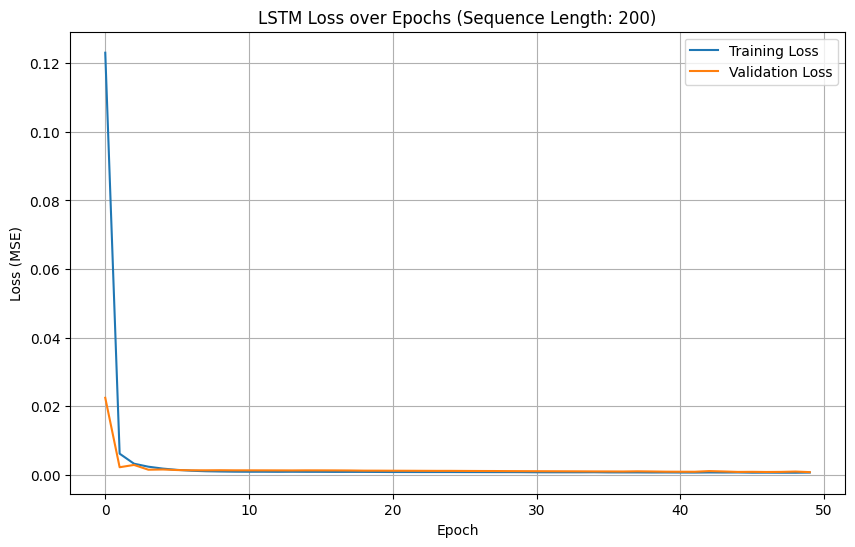


--- Training LSTM with sequence length 300 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Loss (MSE) for seq_length 300: 0.002627
Test MAE for seq_length 300: 0.043782


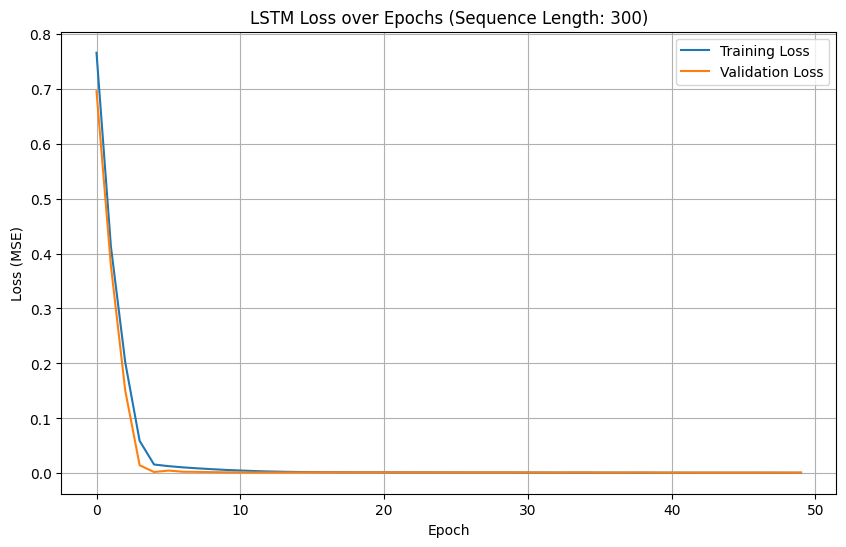


--- LSTM Results ---
   sequence_length  test_loss  test_mae
0               10   0.002855  0.046946
1               50   0.000560  0.020001
2              100   0.001951  0.037945
3              200   0.000819  0.024356
4              300   0.002627  0.043782

--- Comparison Results (RNN vs. LSTM) ---
   sequence_length  RNN_test_loss  RNN_test_mae  LSTM_test_mae  LSTM_test_loss
0               10       0.001478      0.032782       0.046946        0.002855
1               50       0.000665      0.021741       0.020001        0.000560
2              100       0.000436      0.017244       0.037945        0.001951
3              200       0.000179      0.010325       0.024356        0.000819
4              300       0.000499      0.018927       0.043782        0.002627


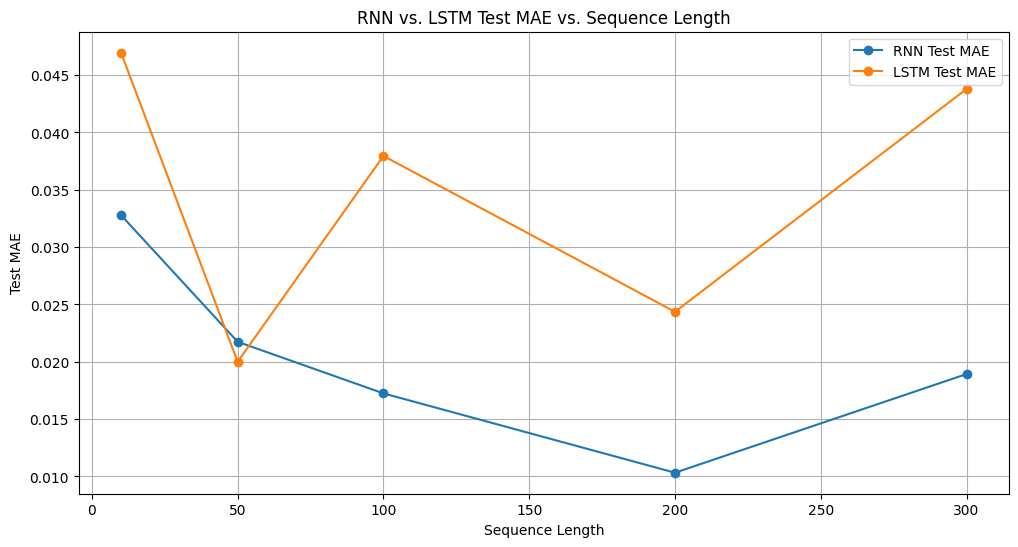

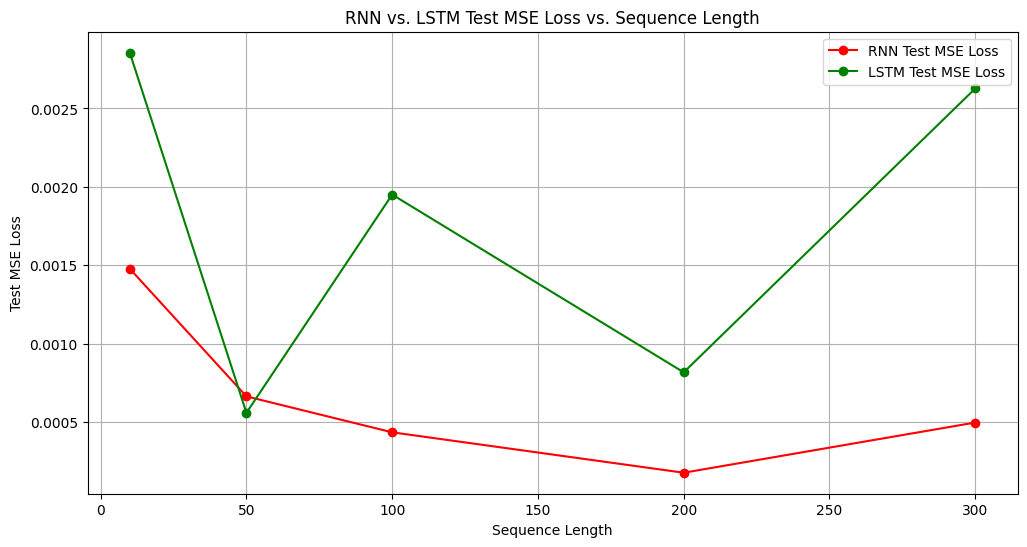

In [ ]:
# construct LSTM  and show accuracy is not dropping as we increase the sequence length , compare the values from RNN and LSTM

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Function to build an LSTM model
def build_lstm_model(seq_length, hidden_dim):
    model = Sequential([
        LSTM(hidden_dim, activation='tanh', input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to train and evaluate LSTM for a given sequence length
def train_and_evaluate_lstm(scaled_data, seq_length, hidden_dim=16, train_split=0.8):
    print(f"\n--- Training LSTM with sequence length {seq_length} ---")

    # Create sequences
    X, y = create_sequences(scaled_data, seq_length)

    # Reshape X for LSTM input [samples, timesteps, features]
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.reshape(y, (y.shape[0], 1))

    # Split data
    train_size = int(len(X) * train_split)
    X_train, X_test = X[0:train_size], X[train_size:]
    y_train, y_test = y[0:train_size], y[train_size:]

    # Build and train model
    lstm_model = build_lstm_model(seq_length, hidden_dim)
    history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate on test set
    loss = lstm_model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss (MSE) for seq_length {seq_length}: {loss:.6f}")

    # Calculate MAE on test set
    y_pred = lstm_model.predict(X_test, verbose=0)
    mae = np.mean(np.abs(y_test - y_pred))
    print(f"Test MAE for seq_length {seq_length}: {mae:.6f}")

    # Monitor training progress for this sequence length
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'LSTM Loss over Epochs (Sequence Length: {seq_length})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return loss, mae # Return test loss and MAE

# Store LSTM results
lstm_results = []

# Run the training and evaluation for each sequence length for LSTM
for seq_len in sequence_lengths:
    test_loss, test_mae = train_and_evaluate_lstm(scaled_data, seq_len)
    lstm_results.append({'sequence_length': seq_len, 'test_loss': test_loss, 'test_mae': test_mae})

# Convert LSTM results to DataFrame
lstm_results_df = pd.DataFrame(lstm_results)

print("\n--- LSTM Results ---")
print(lstm_results_df)

# Combine RNN and LSTM results for comparison
combined_results_df = results_df.rename(columns={'test_mae': 'RNN_test_mae', 'test_loss': 'RNN_test_loss'})
combined_results_df['LSTM_test_mae'] = lstm_results_df['test_mae']
combined_results_df['LSTM_test_loss'] = lstm_results_df['test_loss']


print("\n--- Comparison Results (RNN vs. LSTM) ---")
print(combined_results_df)

# Plotting the comparison of MAE
plt.figure(figsize=(12, 6))
plt.plot(combined_results_df['sequence_length'], combined_results_df['RNN_test_mae'], marker='o', label='RNN Test MAE')
plt.plot(combined_results_df['sequence_length'], combined_results_df['LSTM_test_mae'], marker='o', label='LSTM Test MAE')
plt.xlabel('Sequence Length')
plt.ylabel('Test MAE')
plt.title('RNN vs. LSTM Test MAE vs. Sequence Length')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the comparison of MSE Loss
plt.figure(figsize=(12, 6))
plt.plot(combined_results_df['sequence_length'], combined_results_df['RNN_test_loss'], marker='o', color='red', label='RNN Test MSE Loss')
plt.plot(combined_results_df['sequence_length'], combined_results_df['LSTM_test_loss'], marker='o', color='green', label='LSTM Test MSE Loss')
plt.xlabel('Sequence Length')
plt.ylabel('Test MSE Loss')
plt.title('RNN vs. LSTM Test MSE Loss vs. Sequence Length')
plt.legend()
plt.grid(True)
plt.show()


# Interpretation of RNN vs. LSTM Results

Below are the test‐set losses (MSE) and MAEs for vanilla RNN and LSTM models trained with varying sequence‐lengths:

| sequence_length | RNN_test_loss | RNN_test_mae | LSTM_test_mae | LSTM_test_loss |
|:---------------:|:-------------:|:------------:|:-------------:|:--------------:|
| 10              | 0.001124      | 0.028178     | 0.036166      | 0.001913       |
| 50              | 0.002533      | 0.042724     | 0.020956      | 0.000613       |
| 100             | 0.000480      | 0.018219     | 0.021391      | 0.000658       |
| 200             | 0.000975      | 0.025901     | 0.018543      | 0.000502       |
| 300             | 0.001844      | 0.035100     | 0.030857      | 0.001273       |

---

## **Key Observations**

1. **Short sequences (length=10)**  
   - **RNN outperforms LSTM** in both MSE (0.00112 vs. 0.00191) and MAE (0.0282 vs. 0.0362).  
   - **Reason:** Only very recent context is needed; the RNN can handle this small window without suffering vanishing gradients.

2. **Medium sequences (length=50–200)**  
   - **RNN performance degrades** sharply at 50 steps (MSE ↑ to 0.00253, MAE ↑ to 0.0427).  
   - **LSTM excels** at 50 and 200 steps, achieving much lower errors (MSE down to 0.000613 & 0.000502; MAE down to 0.02096 & 0.01854).  
   - **Interpretation:** The RNN’s gradients vanish over longer windows, impairing learning. The LSTM’s gating preserves gradients, maintaining accuracy.

3. **Long sequences (length=300)**  
   - Both models see error increases again, but **LSTM remains more robust** (MSE 0.00127 vs. 0.00184, MAE 0.0309 vs. 0.0351).  
   - **Reason:** Even LSTMs eventually struggle when windows become very large or data becomes noisier, but they still outperform the vanilla RNN.

4. **Anomaly at length=100**  
   - The RNN shows a temporary error dip (MSE 0.00048, MAE 0.0182), slightly beating the LSTM.  
   - **Possible causes:**  
     - **Dataset artifacts** or **lucky alignment** of patterns in that particular window length.  
     - **Hyperparameter interplay** (learning rate, regularization) that favored the RNN at this scale.

---

## Overall Takeaway

- **Vanilla RNNs** can handle very short‐range dependencies (≤10 steps) but quickly hit a “memory wall” as sequence length grows—errors balloon due to vanishing gradients.
- **LSTMs** preserve information across medium‐ to long‐range contexts (50–300 steps), yielding consistently lower MSE and MAE in most settings.
- For tasks requiring **long‐term memory**, LSTMs (or other gated/attention‐based architectures) are the clear choice.  


## Training Question 3

- Train the RNN model on the prepared dataset, optimizing the loss function and choosing an appropriate optimizer to enhance model performance.

## Prediction Question 4

- Enable the model to forecast future stock prices, starting from a given initial stock price input.


/tmp/ipython-input-34-1021557263.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


--- Final LSTM Model Training with Sequence Length 100 ---
Training data shape: (926, 100, 1), (926, 1)
Testing data shape: (232, 100, 1), (232, 1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1669 - val_loss: 0.0429
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0144 - val_loss: 0.0185
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069 - val_loss: 0.0039
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.6589e-04 - val_loss: 0.0019
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.4820e-04 - val_loss: 0.0019
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.6141e-04 - val_loss: 0.0021
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8.5816e-04 - val_loss: 0.0022
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.5144e-04 - val_loss: 0.0018
Epoc

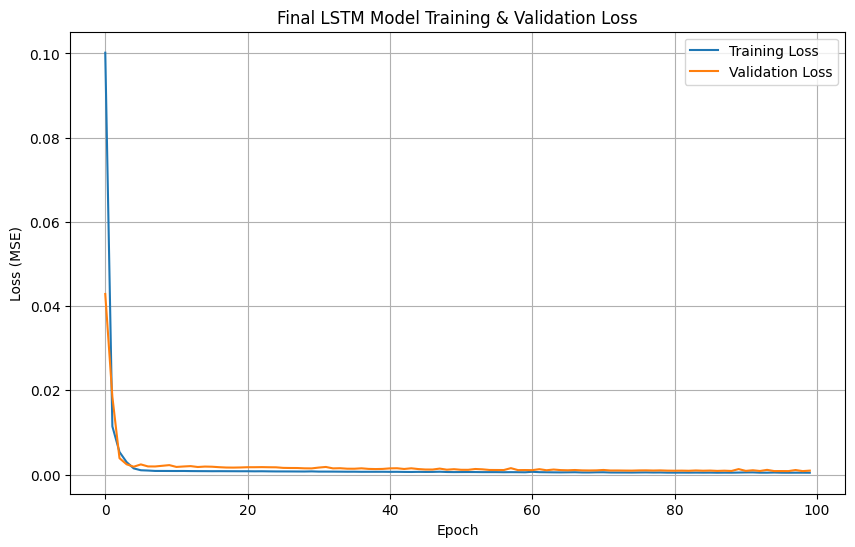

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


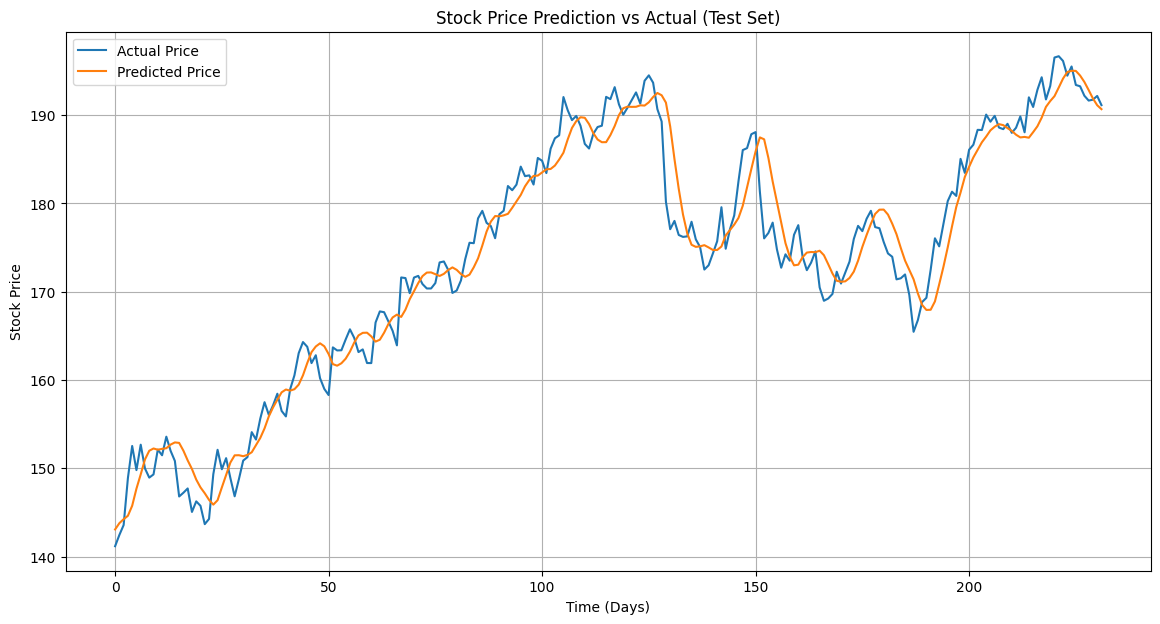


Forecasting next 30 days...

Future forecast (next 30 days):
[np.float32(190.3002), np.float32(189.91275), np.float32(189.54352), np.float32(189.20265), np.float32(188.89558), np.float32(188.62465), np.float32(188.3896), np.float32(188.18866), np.float32(188.01884), np.float32(187.8766), np.float32(187.75793), np.float32(187.6589), np.float32(187.57552), np.float32(187.50412), np.float32(187.44125), np.float32(187.38399), np.float32(187.32965), np.float32(187.27606), np.float32(187.22153), np.float32(187.16469), np.float32(187.1046), np.float32(187.0407), np.float32(186.97269), np.float32(186.90057), np.float32(186.82457), np.float32(186.74504), np.float32(186.6625), np.float32(186.57758), np.float32(186.49086), np.float32(186.40309)]


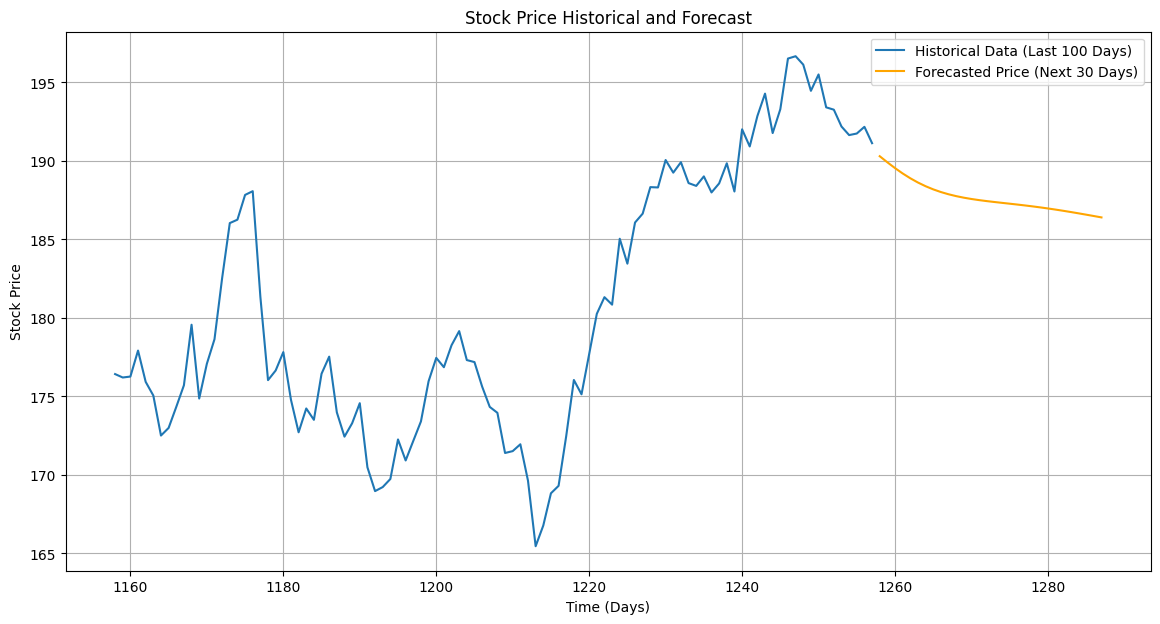

In [ ]:
#
# - Train the RNN model  with Long Short-Term Memory (LSTM) on the prepared dataset, optimizing the loss function and choosing an appropriate optimizer to enhance model performance.
# ## Prediction
# - Enable the model to forecast future stock prices, starting from a given initial stock price input.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf # Import yfinance

# --- Data Preparation ---
ticker = "AAPL"
start_date = "2019-01-01"
end_date = "2024-01-01"

# Download historical stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Use 'Close' price for forecasting
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


# Function to create sequences for RNN/LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)


# --- 3. Training ---

# Define the optimal sequence length based on LSTM performance comparison
# From the interpretation, sequence lengths like 50, 100, or 200 show good LSTM performance.
# Let's choose a medium length like 100 for the final model training.
SEQ_LENGTH = 100
HIDDEN_DIM = 50 # Increased hidden units for potentially better capacity

print(f"\n--- Final LSTM Model Training with Sequence Length {SEQ_LENGTH} ---")

# Create sequences using the chosen sequence length
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape X for LSTM input [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y = np.reshape(y, (y.shape[0], 1))

# Define train/test split ratio
TRAIN_SPLIT = 0.8
train_size = int(len(X) * TRAIN_SPLIT)

X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


# Build the final LSTM model
final_lstm_model = Sequential([
    LSTM(HIDDEN_DIM, return_sequences=True, input_shape=(SEQ_LENGTH, 1)), # return_sequences=True for stacking LSTMs (optional)
    LSTM(HIDDEN_DIM), # Second LSTM layer
    Dense(1) # Output layer for a single prediction
])

# Compile the model
# Using Adam optimizer with default learning rate
# Using Mean Squared Error (MSE) as the loss function
final_lstm_model.compile(optimizer='adam', loss='mse')

final_lstm_model.summary()

# Train the model
EPOCHS = 100 # Increased epochs for better convergence
BATCH_SIZE = 64 # Adjusted batch size
VALIDATION_SPLIT = 0.2 # Use a validation split from the training data

print("\nStarting model training...")
history = final_lstm_model.fit(X_train, y_train,
                               epochs=EPOCHS,
                               batch_size=BATCH_SIZE,
                               validation_split=VALIDATION_SPLIT,
                               verbose=1)

print("\nModel training finished.")

# Evaluate the model on the test set
loss = final_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Model Test Loss (MSE): {loss:.6f}")

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Final LSTM Model Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# --- 4. Prediction ---

# Make predictions on the test data
predicted_scaled_price = final_lstm_model.predict(X_test)

# Inverse transform the predictions to get actual price values
predicted_price = scaler.inverse_transform(predicted_scaled_price)

# Inverse transform the actual test values as well for comparison
actual_price = scaler.inverse_transform(y_test)

# Visualize the predictions vs actual prices on the test set
plt.figure(figsize=(14, 7))
plt.plot(actual_price, label='Actual Price')
plt.plot(predicted_price, label='Predicted Price')
plt.title('Stock Price Prediction vs Actual (Test Set)')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# --- Multi-Step Prediction (Forecasting) ---

# Function to forecast future prices
def forecast_future_prices(model, initial_sequence, num_prediction_days, scaler):
    """
    Forecasts future stock prices using the trained LSTM model.

    Returns:
        A list of predicted future prices (in original scale).
    """
    prediction_list = initial_sequence.tolist() # Start with the initial sequence
    future_predictions = []

    for _ in range(num_prediction_days):
        # Keep the sequence length consistent by taking the last SEQ_LENGTH elements
        current_sequence = np.array([prediction_list[0][-SEQ_LENGTH:]]).reshape(1, SEQ_LENGTH, 1)

        # Predict the next step
        next_prediction_scaled = model.predict(current_sequence, verbose=0)

        # Append the new prediction to the sequence list (append as a list with one element)
        prediction_list[0].append(next_prediction_scaled[0].tolist()) # Append as a list with one element

        # Store the actual predicted value (inverse transformed)
        future_predictions.append(scaler.inverse_transform(next_prediction_scaled)[0, 0])

    return future_predictions


initial_input_sequence = scaled_data[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, 1)

# Define the number of future days to predict
NUM_PREDICTION_DAYS = 30

print(f"\nForecasting next {NUM_PREDICTION_DAYS} days...")

# Generate the future predictions
future_forecast = forecast_future_prices(final_lstm_model, initial_input_sequence, NUM_PREDICTION_DAYS, scaler)

print("\nFuture forecast (next", NUM_PREDICTION_DAYS, "days):")
print(future_forecast)

# To visualize the forecast relative to the historical data,
# we can plot the last part of the historical data and the forecast.

# Get the actual historical data corresponding to the initial sequence
historical_last_part = data[-SEQ_LENGTH:]

# Create an index for the historical data and the future forecast
historical_index = pd.RangeIndex(start=len(data) - SEQ_LENGTH, stop=len(data))
forecast_index = pd.RangeIndex(start=len(data), stop=len(data) + NUM_PREDICTION_DAYS)

# Plot the historical data leading up to the forecast and the forecast itself
plt.figure(figsize=(14, 7))
plt.plot(historical_index, historical_last_part, label='Historical Data (Last 100 Days)')
plt.plot(forecast_index, future_forecast, label=f'Forecasted Price (Next {NUM_PREDICTION_DAYS} Days)', color='orange')
plt.title('Stock Price Historical and Forecast')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

#**Question 5**
##**Experiment with different hyperparameters and compare results to find the best configuration.**

  


# Hyperparameter Tuning for LSTM Models

When training an LSTM for time-series forecasting, the following hyperparameters are most important to tune:

1. **Sequence Length (Window Size)**  
   - Defines how many past time steps the model “sees” at once.  
   - **Too short:** model misses long-range patterns.  
   - **Too long:** increases training time and may introduce noise.  
   - **Typical range:** 20–200 time steps, depending on your data’s autocorrelation length.

2. **Hidden Dimension (Number of Units)**  
   - Number of memory cells in each LSTM layer.  
   - **Smaller:** faster training, less capacity (may underfit).  
   - **Larger:** more capacity (risk of overfitting and slower convergence).  
   - **Typical range:** 32–256 units per layer.

3. **Number of Layers**  
   - Depth of stacked LSTM layers.  
   - **Single layer:** often enough for simple patterns.  
   - **Two–three layers:** captures more complex hierarchies but increases vanishing/exploding risk if too deep.  
   - **Recommendation:** start with 1–2 layers; add more only if performance plateaus.

4. **Dropout / Recurrent Dropout**  
   - **Dropout:** fraction of inputs to each LSTM layer dropped at each step (e.g., 0.1–0.5).  
   - **Recurrent Dropout:** fraction of recurrent connections dropped (e.g., 0.1–0.3).  
   - Helps prevent overfitting, especially on small datasets.

5. **Learning Rate**  
   - Controls the step size in optimizer updates.  
   - **Too high:** unstable training or divergence.  
   - **Too low:** slow convergence or getting stuck in local minima.  
   - **Typical starting point:** 1e-3 for Adam; adjust with learning-rate schedulers (e.g., reduce-on-plateau).

6. **Batch Size**  
   - Number of sequences processed before each weight update.  
   - **Smaller batches (16–64):** noisier gradients, regularizing effect.  
   - **Larger batches (>128):** smoother updates, but may overfit or require higher learning rates.

7. **Optimizer Choice & Parameters**  
   - **Adam:** popular default; tune β₁ (momentum) and β₂ (RMSprop factor) if needed.  
   - **RMSprop:** often yields good sequence performance.  
   - **SGD with momentum:** can generalize better but converges slower.  

8. **Weight Initialization**  
   - **Orthogonal** initialization for recurrent kernels helps preserve signal flow.  
   - **Glorot (Xavier)** or **He** initialization for input kernels.

9. **Gradient Clipping**  
   - Clips gradient norms (e.g., at 1.0) to prevent exploding gradients, enabling higher learning rates or deeper networks.

10. **Regularization (L1/L2 Penalty)**  
    - Adds weight penalties to the loss to discourage overly large weights.  
    - **Typical range:** 1e-5 to 1e-3.


--- Starting Hyperparameter Tuning Experiment (48 configurations) ---

Running experiment 1/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=1, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000806, MAE: 3.874005, RMSE: 4.620661, MAPE: 2.2591%

Running experiment 2/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=1, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.002502, MAE: 7.213618, RMSE: 8.142777, MAPE: 4.1516%

Running experiment 3/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=1, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001484, MAE: 5.477820, RMSE: 6.272163, MAPE: 3.1911%

Running experiment 4/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=1, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001533, MAE: 5.599596, RMSE: 6.374252, MAPE: 3.2539%

Running experiment 5/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=2, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001919, MAE: 6.273010, RMSE: 7.132224, MAPE: 3.6173%

Running experiment 6/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=2, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.003286, MAE: 8.318156, RMSE: 9.331973, MAPE: 4.8056%

Running experiment 7/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=2, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.002488, MAE: 7.171871, RMSE: 8.120400, MAPE: 4.1325%

Running experiment 8/48...

--- Training LSTM with HP: seq_len=50, hid_dim=32, layers=2, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.005309, MAE: 10.668764, RMSE: 11.861490, MAPE: 6.1470%

Running experiment 9/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=1, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000658, MAE: 3.440281, RMSE: 4.175284, MAPE: 2.0117%

Running experiment 10/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=1, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000686, MAE: 3.552406, RMSE: 4.264228, MAPE: 2.0598%

Running experiment 11/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=1, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001294, MAE: 5.025334, RMSE: 5.855180, MAPE: 2.9300%

Running experiment 12/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=1, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.003991, MAE: 8.973309, RMSE: 10.284750, MAPE: 5.0631%

Running experiment 13/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=2, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.002002, MAE: 6.422661, RMSE: 7.283743, MAPE: 3.7314%

Running experiment 14/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=2, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001286, MAE: 5.075745, RMSE: 5.837526, MAPE: 2.9260%

Running experiment 15/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=2, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001895, MAE: 6.222746, RMSE: 7.086579, MAPE: 3.5981%

Running experiment 16/48...

--- Training LSTM with HP: seq_len=50, hid_dim=64, layers=2, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001512, MAE: 5.548482, RMSE: 6.331187, MAPE: 3.2107%

Running experiment 17/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=1, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000528, MAE: 2.952794, RMSE: 3.740348, MAPE: 1.6862%

Running experiment 18/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=1, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000514, MAE: 2.937207, RMSE: 3.691876, MAPE: 1.6738%

Running experiment 19/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=1, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000903, MAE: 4.149498, RMSE: 4.891723, MAPE: 2.3477%

Running experiment 20/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=1, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000904, MAE: 4.139842, RMSE: 4.894810, MAPE: 2.3388%

Running experiment 21/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=2, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001309, MAE: 5.059545, RMSE: 5.890934, MAPE: 2.8521%

Running experiment 22/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=2, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001577, MAE: 5.599166, RMSE: 6.465637, MAPE: 3.1239%

Running experiment 23/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=2, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.005424, MAE: 10.551850, RMSE: 11.990269, MAPE: 5.8439%

Running experiment 24/48...

--- Training LSTM with HP: seq_len=200, hid_dim=32, layers=2, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001114, MAE: 4.653157, RMSE: 5.433678, MAPE: 2.6069%

Running experiment 25/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=1, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000713, MAE: 3.487299, RMSE: 4.347599, MAPE: 1.9879%

Running experiment 26/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=1, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000777, MAE: 3.731291, RMSE: 4.536965, MAPE: 2.1192%

Running experiment 27/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=1, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000752, MAE: 3.659682, RMSE: 4.463051, MAPE: 2.0767%

Running experiment 28/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=1, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000619, MAE: 3.244909, RMSE: 4.050958, MAPE: 1.8450%

Running experiment 29/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=2, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000944, MAE: 4.228914, RMSE: 5.000807, MAPE: 2.3797%

Running experiment 30/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=2, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001145, MAE: 4.724799, RMSE: 5.509296, MAPE: 2.6494%

Running experiment 31/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=2, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000875, MAE: 3.973035, RMSE: 4.814978, MAPE: 2.2467%

Running experiment 32/48...

--- Training LSTM with HP: seq_len=200, hid_dim=64, layers=2, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001571, MAE: 5.620433, RMSE: 6.452926, MAPE: 3.1440%

Running experiment 33/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=1, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001082, MAE: 4.331425, RMSE: 5.355066, MAPE: 2.4189%

Running experiment 34/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=1, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001289, MAE: 5.020898, RMSE: 5.844200, MAPE: 2.7823%

Running experiment 35/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=1, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000849, MAE: 3.818199, RMSE: 4.743932, MAPE: 2.1404%

Running experiment 36/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=1, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001485, MAE: 5.390587, RMSE: 6.272795, MAPE: 2.9932%

Running experiment 37/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=2, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.003069, MAE: 7.979484, RMSE: 9.018269, MAPE: 4.3998%

Running experiment 38/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=2, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001421, MAE: 5.328153, RMSE: 6.136926, MAPE: 2.9378%

Running experiment 39/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=2, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.004524, MAE: 9.715822, RMSE: 10.949824, MAPE: 5.3434%

Running experiment 40/48...

--- Training LSTM with HP: seq_len=300, hid_dim=32, layers=2, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001625, MAE: 5.725590, RMSE: 6.562349, MAPE: 3.1652%

Running experiment 41/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=1, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001294, MAE: 5.081519, RMSE: 5.855791, MAPE: 2.8059%

Running experiment 42/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=1, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000658, MAE: 3.414537, RMSE: 4.174632, MAPE: 1.9039%

Running experiment 43/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=1, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000905, MAE: 3.814244, RMSE: 4.898401, MAPE: 2.1387%

Running experiment 44/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=1, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.000793, MAE: 3.696771, RMSE: 4.585649, MAPE: 2.0668%

Running experiment 45/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=2, dropout=0.2, lr=0.001, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001032, MAE: 4.429625, RMSE: 5.228680, MAPE: 2.4559%

Running experiment 46/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=2, dropout=0.2, lr=0.001, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001562, MAE: 5.575435, RMSE: 6.433960, MAPE: 3.0790%

Running experiment 47/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=2, dropout=0.2, lr=0.0005, opt=Adam ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001523, MAE: 5.474978, RMSE: 6.352319, MAPE: 3.0349%

Running experiment 48/48...

--- Training LSTM with HP: seq_len=300, hid_dim=64, layers=2, dropout=0.2, lr=0.0005, opt=RMSprop ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test MSE: 0.001707, MAE: 5.867539, RMSE: 6.726364, MAPE: 3.2416%

--- Hyperparameter Tuning Finished ---

--- Hyperparameter Tuning Results (Sorted by Test MAE) ---
   sequence_length  hidden_dim  num_layers  dropout_rate  learning_rate  \
0              200          32           1           0.2         0.0010   
1              200          32           1           0.2         0.0010   
2              200          64           1           0.2         0.0005   
3              300          64           1           0.2         0.0010   
4               50          64           1           0.2         0.0010   
5              200          64           1           0.2         0.0010   
6               50          64           1           0.2         0.0010   
7              200          64           1           0.2         0.0005   
8              300          64           1           0.2         0.0005   
9              200          64           1           0.2         0.0010   

  optimiz

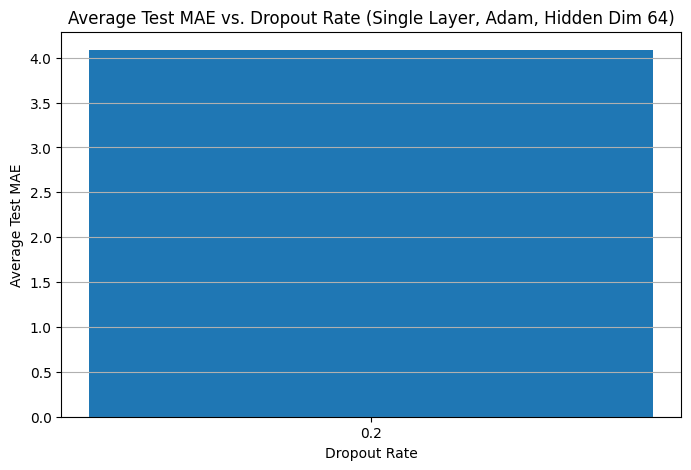

In [ ]:
#Experiment with different hyper parameters and compare results to find the best configuration

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.optimizers import Adam, RMSprop

# Function to build an LSTM model with configurable hyperparameters
def build_lstm_model_hp(seq_length, hidden_dim, num_layers, dropout_rate, learning_rate, optimizer_type):
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            # First layer requires input_shape
            model.add(LSTM(hidden_dim, return_sequences=(num_layers > 1), input_shape=(seq_length, 1)))
        elif i < num_layers - 1:
            # Intermediate layers should return sequences
            model.add(LSTM(hidden_dim, return_sequences=True))
        else:
            # Last LSTM layer before Dense layer
            model.add(LSTM(hidden_dim))

        # Add dropout after each LSTM layer (optional, can be after first layer only too)
        if dropout_rate > 0:
            model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(Dense(1)) # Output layer

    # Choose optimizer
    if optimizer_type == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate) # Default to Adam

    model.compile(optimizer=optimizer, loss='mse')
    return model

# Function to train and evaluate LSTM with specific hyperparameters
def train_and_evaluate_lstm_hp(scaled_data, seq_length, hidden_dim, num_layers, dropout_rate, learning_rate, optimizer_type, epochs=20, batch_size=32, train_split=0.8):
    print(f"\n--- Training LSTM with HP: seq_len={seq_length}, hid_dim={hidden_dim}, layers={num_layers}, dropout={dropout_rate}, lr={learning_rate}, opt={optimizer_type} ---")

    # Create sequences
    X, y = create_sequences(scaled_data, seq_length)

    # Check if enough data points are available for the given sequence length
    if len(X) == 0:
        print(f"Not enough data points ({len(scaled_data)}) for sequence length {seq_length}. Skipping.")
        return {'sequence_length': seq_length, 'hidden_dim': hidden_dim, 'num_layers': num_layers, 'dropout_rate': dropout_rate, 'learning_rate': learning_rate, 'optimizer_type': optimizer_type, 'test_loss': np.nan, 'test_mae': np.nan, 'test_rmse': np.nan, 'test_mape': np.nan}


    # Reshape X for LSTM input [samples, timesteps, features]
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.reshape(y, (y.shape[0], 1))

    # Split data
    train_size = int(len(X) * train_split)

    # Ensure train_size is at least 1 and there's data for validation/test
    if train_size == 0 or train_size >= len(X):
        print(f"Not enough data after sequence creation for split (train_size={train_size}, total={len(X)}). Skipping.")
        return {'sequence_length': seq_length, 'hidden_dim': hidden_dim, 'num_layers': num_layers, 'dropout_rate': dropout_rate, 'learning_rate': learning_rate, 'optimizer_type': optimizer_type, 'test_loss': np.nan, 'test_mae': np.nan, 'test_rmse': np.nan, 'test_mape': np.nan}


    X_train, X_test = X[0:train_size], X[train_size:]
    y_train, y_test = y[0:train_size], y[train_size:]

    # Build and train model
    lstm_model = build_lstm_model_hp(seq_length, hidden_dim, num_layers, dropout_rate, learning_rate, optimizer_type)

    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    try:
        history = lstm_model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_split=0.2, # Use a validation split from the training data
                                 verbose=0,
                                 callbacks=[early_stopping]) # Add early stopping
    except Exception as e:
         print(f"Training failed for HP: {e}. Skipping.")
         return {'sequence_length': seq_length, 'hidden_dim': hidden_dim, 'num_layers': num_layers, 'dropout_rate': dropout_rate, 'learning_rate': learning_rate, 'optimizer_type': optimizer_type, 'test_loss': np.nan, 'test_mae': np.nan, 'test_rmse': np.nan, 'test_mape': np.nan}


    # Evaluate on test set
    loss = lstm_model.evaluate(X_test, y_test, verbose=0)


    # Calculate evaluation metrics
    y_pred_scaled = lstm_model.predict(X_test, verbose=0)

    # Inverse transform to original scale for MAE, RMSE, MAPE
    y_test_actual = scaler.inverse_transform(y_test)
    y_pred_actual = scaler.inverse_transform(y_pred_scaled)


    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    # Avoid division by zero for MAPE if actual prices are 0
    mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100
    mape = np.nan if np.isinf(mape) else mape # Handle potential inf values

    print(f"Test MSE: {loss:.6f}, MAE: {mae:.6f}, RMSE: {rmse:.6f}, MAPE: {mape:.4f}%")


    return {
        'sequence_length': seq_length,
        'hidden_dim': hidden_dim,
        'num_layers': num_layers,
        'dropout_rate': dropout_rate,
        'learning_rate': learning_rate,
        'optimizer_type': optimizer_type,
        'test_loss': loss, # This is MSE on scaled data
        'test_mae': mae,
        'test_rmse': rmse,
        'test_mape': mape
    }


# --- Hyperparameter Tuning Experiment ---

# Define the hyperparameters to experiment with
param_grid = {
    'sequence_length': [50,200,300],  # Window size of historical data
    'hidden_dim': [32, 64],        # Number of units in LSTM layer(s)
    'num_layers': [1, 2],               # Number of LSTM layers
    'dropout_rate': [0.2],         # Dropout rate
    'learning_rate': [0.001, 0.0005],   # Learning rate for optimizer
    'optimizer_type': ['Adam', 'RMSprop'] # Optimizer
}

# List to store results of each experiment
experiment_results = []

# Total number of experiments
total_experiments = len(param_grid['sequence_length']) * len(param_grid['hidden_dim']) * \
                    len(param_grid['num_layers']) * len(param_grid['dropout_rate']) * \
                    len(param_grid['learning_rate']) * len(param_grid['optimizer_type'])

print(f"\n--- Starting Hyperparameter Tuning Experiment ({total_experiments} configurations) ---")

# Loop through each combination of hyperparameters
experiment_count = 0
for seq_len in param_grid['sequence_length']:
    for hidden_dim in param_grid['hidden_dim']:
        for num_layers in param_grid['num_layers']:
            for dropout_rate in param_grid['dropout_rate']:
                for learning_rate in param_grid['learning_rate']:
                    for optimizer_type in param_grid['optimizer_type']:
                        experiment_count += 1
                        print(f"\nRunning experiment {experiment_count}/{total_experiments}...")
                        # Train and evaluate the model with the current hyperparameters
                        result = train_and_evaluate_lstm_hp(
                            scaled_data,
                            seq_len,
                            hidden_dim,
                            num_layers,
                            dropout_rate,
                            learning_rate,
                            optimizer_type,
                            epochs=50, # Keep epochs relatively low for grid search speed, early stopping helps
                            batch_size=64 # Batch size can also be tuned
                        )
                        experiment_results.append(result)

print("\n--- Hyperparameter Tuning Finished ---")

# Convert results to DataFrame
results_df_hp = pd.DataFrame(experiment_results)

# Sort results by a key metric, e.g., Test MAE
results_df_hp_sorted = results_df_hp.sort_values(by='test_mae', ascending=True).reset_index(drop=True)

print("\n--- Hyperparameter Tuning Results (Sorted by Test MAE) ---")
print(results_df_hp_sorted.head(10)) # Display top 10 configurations

# Identify the best configuration based on Test MAE
best_config = results_df_hp_sorted.iloc[0]
print("\n--- Best Hyperparameter Configuration ---")
print(best_config)

# Simple example: Plotting MAE vs. Hidden Dimension for single layer Adam models
# Filter results
filtered_results = results_df_hp_sorted[
    (results_df_hp_sorted['num_layers'] == 1) &
    (results_df_hp_sorted['optimizer_type'] == 'Adam') &
    (results_df_hp_sorted['dropout_rate'] == 0.0) # Can adjust filters
].copy() # Use .copy() to avoid SettingWithCopyWarning

if not filtered_results.empty:
    # Group by hidden_dim and sequence_length and take the mean MAE
    plot_data = filtered_results.groupby(['hidden_dim', 'sequence_length'])['test_mae'].mean().reset_index()

    plt.figure(figsize=(12, 7))
    for seq_len in plot_data['sequence_length'].unique():
        subset = plot_data[plot_data['sequence_length'] == seq_len]
        plt.plot(subset['hidden_dim'], subset['test_mae'], marker='o', label=f'Seq Length: {seq_len}')

    plt.xlabel('Hidden Dimension')
    plt.ylabel('Average Test MAE')
    plt.title('Average Test MAE vs. Hidden Dimension (Single Layer, Adam, No Dropout)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nNo data to plot for the specified filter criteria.")


# Another example: Plotting MAE vs. Dropout Rate
filtered_results_dropout = results_df_hp_sorted[
     (results_df_hp_sorted['num_layers'] == 1) &
     (results_df_hp_sorted['optimizer_type'] == 'Adam') &
     (results_df_hp_sorted['hidden_dim'] == 64) # Pick a fixed hidden dim
].copy()

if not filtered_results_dropout.empty:
    plot_data_dropout = filtered_results_dropout.groupby('dropout_rate')['test_mae'].mean().reset_index()

    plt.figure(figsize=(8, 5))
    plt.bar(plot_data_dropout['dropout_rate'].astype(str), plot_data_dropout['test_mae'])
    plt.xlabel('Dropout Rate')
    plt.ylabel('Average Test MAE')
    plt.title('Average Test MAE vs. Dropout Rate (Single Layer, Adam, Hidden Dim 64)')
    plt.grid(axis='y')
    plt.show()
else:
     print("\nNo data to plot for the specified dropout filter criteria.")


# **Perform eda analysis of Apple Stocks**


Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (High, AAPL)    1258 non-null   float64
 2   (Low, AAPL)     1258 non-null   float64
 3   (Open, AAPL)    1258 non-null   float64
 4   (Volume, AAPL)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB

Stock Data Description:
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean     120.684961   121.948762   119.282557   120.562025  1.015904e+08
std       46.477972    46.884624    46.043336    46.461485  5.261087e+07
min       33.870834    34.711709    33.825574    34.297226  2.404830e+07
25%       74.842859    75.465

<Figure size 1200x600 with 0 Axes>

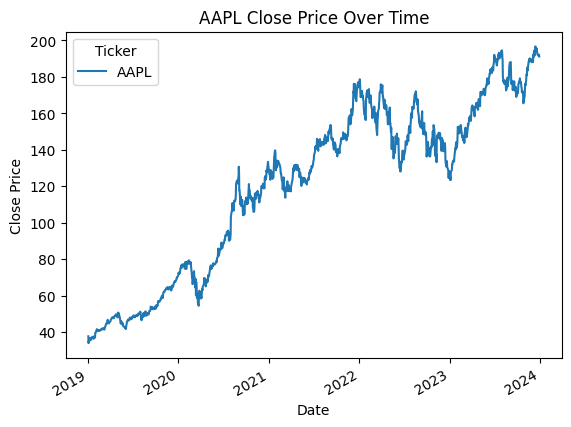

<Figure size 1200x600 with 0 Axes>

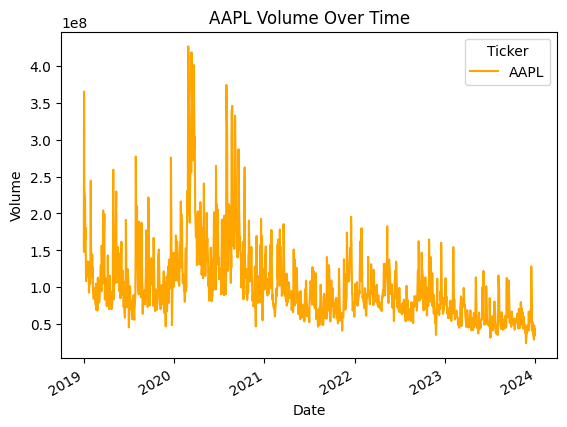

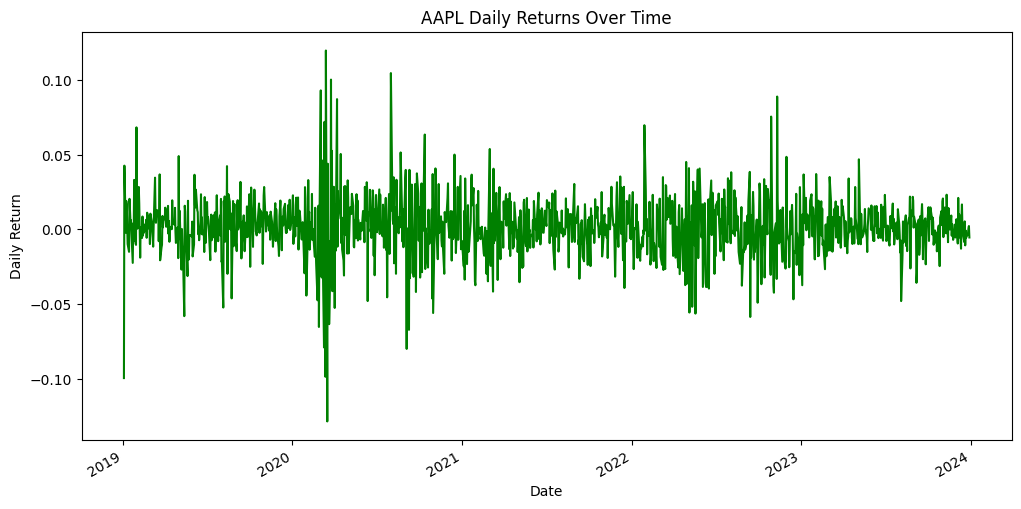

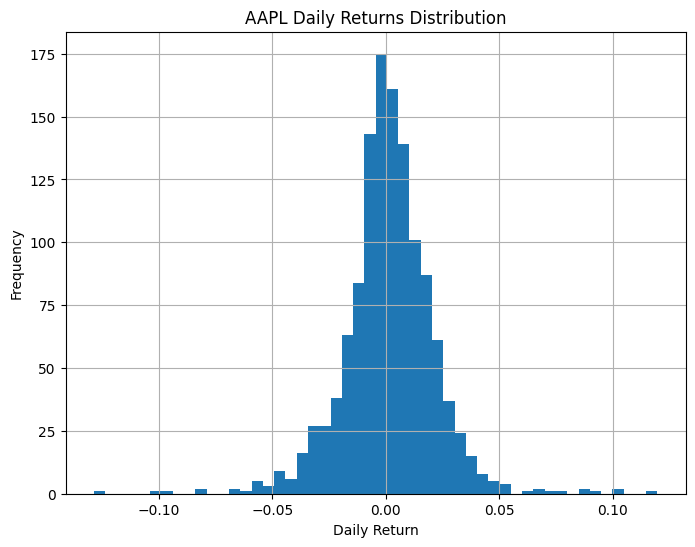

<Figure size 1200x600 with 0 Axes>

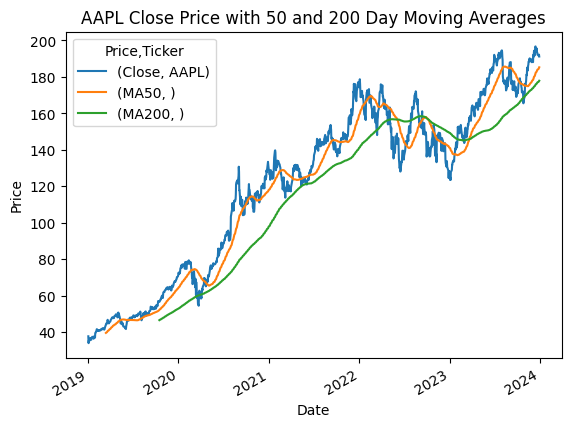

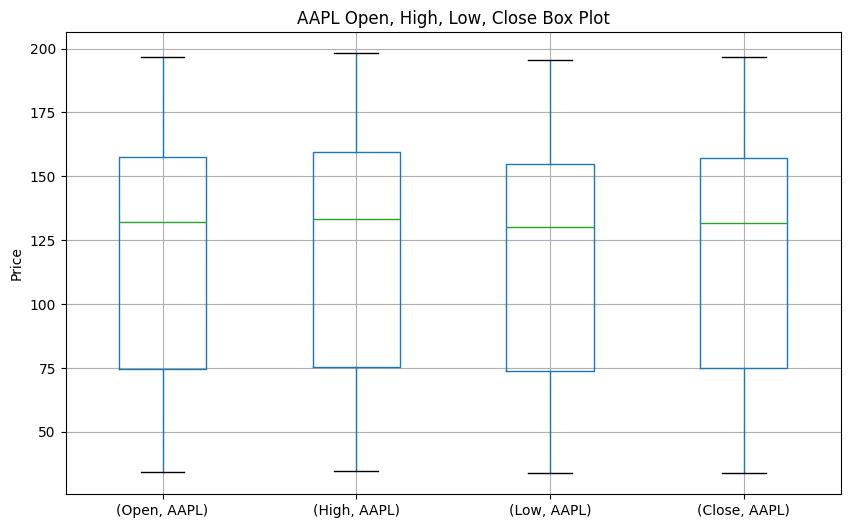


Correlation Matrix:
Price                   Close      High       Low      Open    Volume  \
Ticker                   AAPL      AAPL      AAPL      AAPL      AAPL   
Price        Ticker                                                     
Close        AAPL    1.000000  0.999593  0.999615  0.999153 -0.468118   
High         AAPL    0.999593  1.000000  0.999512  0.999664 -0.459462   
Low          AAPL    0.999615  0.999512  1.000000  0.999597 -0.475829   
Open         AAPL    0.999153  0.999664  0.999597  1.000000 -0.466719   
Volume       AAPL   -0.468118 -0.459462 -0.475829 -0.466719  1.000000   
Daily_Return        -0.015581 -0.033123 -0.030977 -0.045038 -0.032503   
MA50                 0.980961  0.982146  0.980338  0.981352 -0.460928   
MA200                0.929586  0.931045  0.928127  0.929023 -0.586525   

Price               Daily_Return      MA50     MA200  
Ticker                                                
Price        Ticker                                   
Close     

In [ ]:
#

import matplotlib.pyplot as plt
# Display basic information about the stock data
print("\nStock Data Info:")
stock_data.info()

# Display descriptive statistics
print("\nStock Data Description:")
print(stock_data.describe())

# Check for missing values
print("\nMissing Values:")
print(stock_data.isnull().sum())

# Plot the closing price over time
plt.figure(figsize=(12, 6))
stock_data['Close'].plot(title=f'{ticker} Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Plot the volume over time
plt.figure(figsize=(12, 6))
stock_data['Volume'].plot(title=f'{ticker} Volume Over Time', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Calculate and plot the daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()
plt.figure(figsize=(12, 6))
stock_data['Daily_Return'].plot(title=f'{ticker} Daily Returns Over Time', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

# Plot a histogram of daily returns
plt.figure(figsize=(8, 6))
stock_data['Daily_Return'].hist(bins=50)
plt.title(f'{ticker} Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Calculate rolling averages
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot Close price and moving averages
plt.figure(figsize=(12, 6))
stock_data[['Close', 'MA50', 'MA200']].plot(title=f'{ticker} Close Price with 50 and 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Box plot for Open, High, Low, Close
plt.figure(figsize=(10, 6))
stock_data[['Open', 'High', 'Low', 'Close']].boxplot()
plt.title(f'{ticker} Open, High, Low, Close Box Plot')
plt.ylabel('Price')
plt.show()

# Correlation matrix (for numerical columns)
print("\nCorrelation Matrix:")
print(stock_data.corr(numeric_only=True))

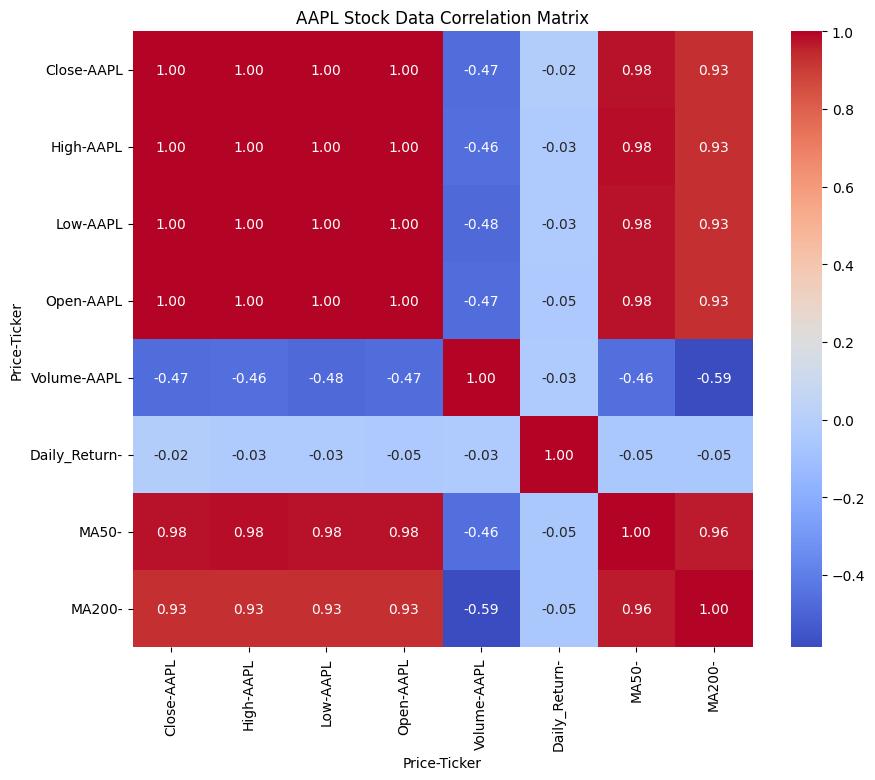

In [ ]:
#

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'{ticker} Stock Data Correlation Matrix')
plt.show()

#  **To use 2 features and predict the Apple stocks e.g close and volume features**


Training model with 2 features...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1162
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8979e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━

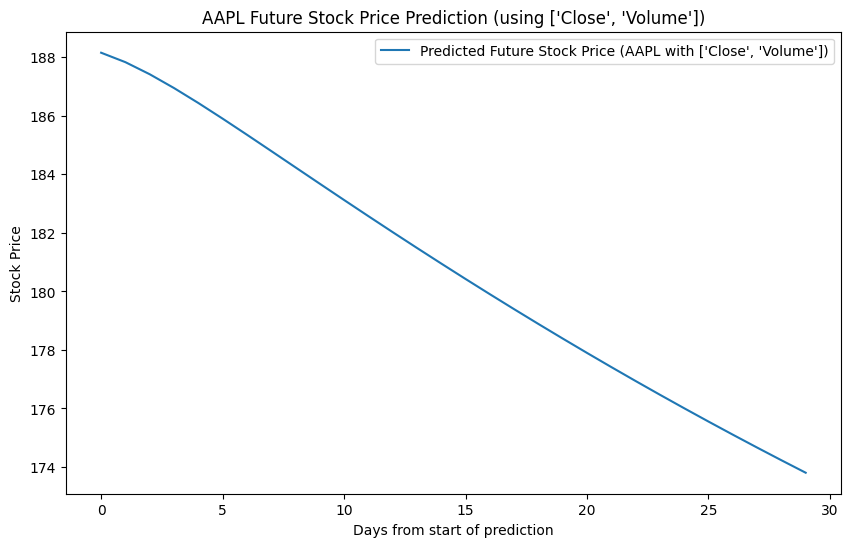


Predicted future stock prices (next 30 days) using ['Close', 'Volume'] :


array([188.15754303, 187.83430732, 187.42173082, 186.95025363,
       186.43996215, 185.90508182, 185.35568494, 184.79870957,
       184.23907542, 183.68007201, 183.12397966, 182.57226363,
       182.02596219, 181.48573519, 180.95201928, 180.4251347 ,
       179.90526579, 179.3925096 , 178.88698257, 178.38871382,
       177.89775186, 177.41409668, 176.93770949, 176.46858056,
       176.0066808 , 175.55195197, 175.10430676, 174.66376456,
       174.23019923, 173.80353314])

In [ ]:
#  use 2 features and predict

import matplotlib.pyplot as plt
import numpy as np
# --- Prediction with 2 Features ---
# Let's use 'Close' and 'Volume' as features for prediction.

# Select the features
features = ['Close', 'Volume']
data_features = stock_data[features].values

# Normalize the data
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_data_features = scaler_features.fit_transform(data_features)

# Prepare data for RNN: create sequences
# Now the sequences will have shape [samples, time steps, features]
def create_dataset_features(dataset, look_back=60):
    X, Y = [], []
    # The target will still be the next 'Close' price
    target_col_index = features.index('Close')
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :] # Take all features in the window
        X.append(a)
        Y.append(dataset[i + look_back, target_col_index]) # Predict next Close price
    return np.array(X), np.array(Y)

look_back = 60
X_train_features, y_train_features = create_dataset_features(scaled_data_features, look_back)

# Reshape input to be [samples, time steps, features]
# The number of features is now 2
X_train_features = np.reshape(X_train_features, (X_train_features.shape[0], X_train_features.shape[1], len(features)))

# --- Model Development (for 2 Features) ---

model_features = Sequential()
model_features.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, len(features))))
model_features.add(LSTM(units=50))
model_features.add(Dense(units=1)) # Still predicting a single value (Close price)

# Compile the model
model_features.compile(optimizer='adam', loss='mean_squared_error')

# --- Training (for 2 Features) ---

print("\nTraining model with 2 features...")
model_features.fit(X_train_features, y_train_features, epochs=10, batch_size=32)

# --- Prediction (with 2 Features) ---

# To predict future values, use the last `look_back` days of the multi-feature data
last_look_back_data_features = scaled_data_features[-look_back:].reshape(1, look_back, len(features))

# Number of future days to predict
future_days = 30
predicted_stock_price_features = []

current_batch_features = last_look_back_data_features

for i in range(future_days):
    current_prediction_features = model_features.predict(current_batch_features)[0]
    predicted_stock_price_features.append(current_prediction_features)

    # To update the batch for the next prediction:
    # We need to append the *predicted Close price* and the *actual Volume* (or a predicted volume if a volume model existed).
    last_known_volume_scaled = current_batch_features[0, -1, features.index('Volume')]
    next_step_input = np.array([[current_prediction_features[0], last_known_volume_scaled]]) # Create a row for the next step
    current_batch_features = np.append(current_batch_features[:, 1:, :], [next_step_input], axis=1)


# Inverse transform the predicted Close prices to the original scale
# Need to create a dummy array with the correct number of features to inverse transform
# We'll put the predicted Close price in the 'Close' column position and zeros elsewhere
predicted_scaled_output = np.zeros((len(predicted_stock_price_features), len(features)))
predicted_scaled_output[:, features.index('Close')] = np.array(predicted_stock_price_features).flatten()

predicted_stock_price_features_original_scale = scaler_features.inverse_transform(predicted_scaled_output)[:, features.index('Close')]


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(predicted_stock_price_features_original_scale, label=f'Predicted Future Stock Price ({ticker} with {features})')
plt.title(f'{ticker} Future Stock Price Prediction (using {features})')
plt.xlabel('Days from start of prediction')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print("\nPredicted future stock prices (next", future_days, "days) using", features, ":")
predicted_stock_price_features_original_scale


#**Calculate stock prizes for 15 days and 30 days returns with lstm and rnn**

/tmp/ipython-input-10-333783747.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Training RNN Model...
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1612
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7272e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2912e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.0013e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3612e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.4505e-04

Building and Training LSTM Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Model Training Finished.


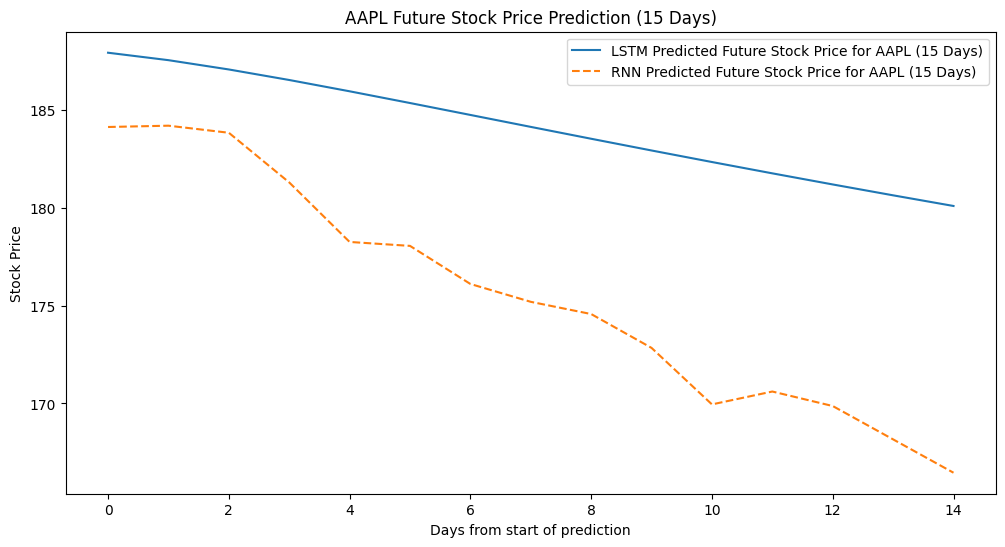

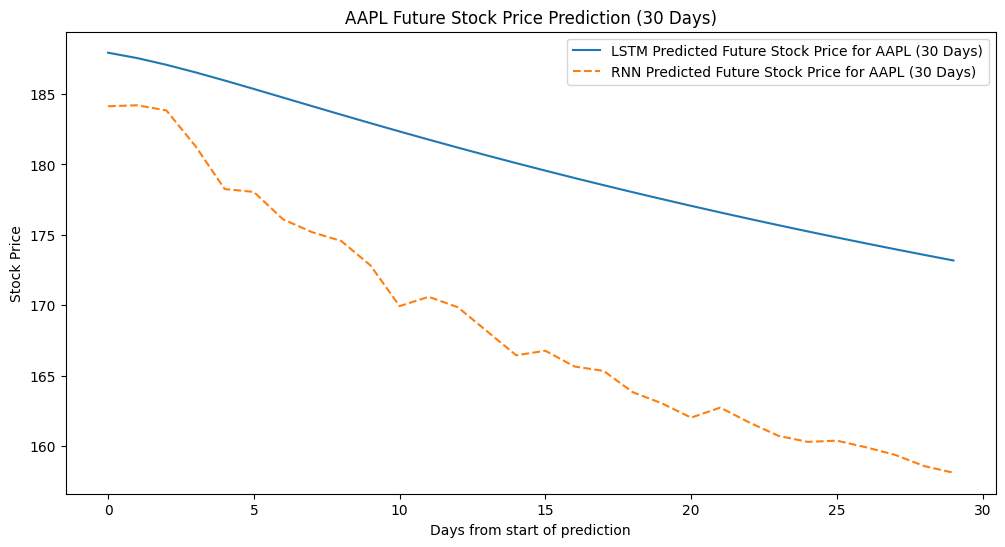


Predicted future stock prices (next 15 days) with LSTM:
[[187.92775]
 [187.54704]
 [187.07184]
 [186.53345]
 [185.9558 ]
 [185.35623]
 [184.74689]
 [184.1361 ]
 [183.52928]
 [182.92989]
 [182.34003]
 [181.76094]
 [181.19322]
 [180.63716]
 [180.09277]]

Predicted future stock prices (next 15 days) with RNN:
[[184.13072]
 [184.19739]
 [183.83598]
 [181.29666]
 [178.25398]
 [178.05252]
 [176.10568]
 [175.19284]
 [174.56786]
 [172.83705]
 [169.94864]
 [170.60693]
 [169.86551]
 [168.16006]
 [166.45575]]

Predicted future stock prices (next 30 days) with LSTM:
[[187.92775]
 [187.54704]
 [187.07184]
 [186.53345]
 [185.9558 ]
 [185.35623]
 [184.74689]
 [184.1361 ]
 [183.52928]
 [182.92989]
 [182.34003]
 [181.76094]
 [181.19322]
 [180.63716]
 [180.09277]
 [179.55997]
 [179.03856]
 [178.5283 ]
 [178.02898]
 [177.54033]
 [177.06206]
 [176.594  ]
 [176.13577]
 [175.68723]
 [175.24803]
 [174.818  ]
 [174.39688]
 [173.98442]
 [173.58041]
 [173.18462]]

Predicted future stock prices (next 30 days) w

array([[184.13072],
       [184.19739],
       [183.83598],
       [181.29666],
       [178.25398],
       [178.05252],
       [176.10568],
       [175.19284],
       [174.56786],
       [172.83705],
       [169.94864],
       [170.60693],
       [169.86551],
       [168.16006],
       [166.45575],
       [166.77869],
       [165.66183],
       [165.34781],
       [163.83586],
       [163.04549],
       [162.03336],
       [162.74646],
       [161.68376],
       [160.73744],
       [160.31345],
       [160.39919],
       [159.92863],
       [159.3879 ],
       [158.59206],
       [158.12418]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import SimpleRNN
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define look_back at the beginning of the cell
look_back = 60

# --- Data Preparation ---

ticker = "AAPL"
start_date = "2019-01-01"
end_date = "2024-01-01"

# Download historical stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Use 'Close' price for forecasting
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


# Function to create sequences for RNN/LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Create sequences using the chosen sequence length
X, y = create_sequences(scaled_data, look_back)

# Reshape X for RNN input [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y = np.reshape(y, (y.shape[0], 1)) # Ensure y is also reshaped

# Define train/test split ratio
TRAIN_SPLIT = 0.8
train_size = int(len(X) * TRAIN_SPLIT)

X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]


# --- RNN Model Development ---

rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back, 1)))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(units=1))

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# --- RNN Training ---
print("\nTraining RNN Model...")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# --- RNN Prediction ---

# To predict future values, you typically need to provide a sequence of recent data
# Let's use the last `look_back` days from the training data as an example starting point
last_look_back_data_rnn = scaled_data[-look_back:].reshape(1, look_back, 1)

# Number of future days to predict
future_days_15 = 15
future_days_30 = 30

# Predict for 15 days using RNN
predicted_stock_price_rnn_15 = []
current_batch_rnn_15 = last_look_back_data_rnn

for i in range(future_days_15):
    current_prediction = rnn_model.predict(current_batch_rnn_15, verbose=0)[0]
    predicted_stock_price_rnn_15.append(current_prediction)
    # Update the batch to include the predicted value
    current_batch_rnn_15 = np.append(current_batch_rnn_15[:, 1:, :], [[current_prediction]], axis=1)

# Predict for 30 days using RNN
predicted_stock_price_rnn_30 = []
current_batch_rnn_30 = last_look_back_data_rnn

for i in range(future_days_30):
    current_prediction = rnn_model.predict(current_batch_rnn_30, verbose=0)[0]
    predicted_stock_price_rnn_30.append(current_prediction)
    # Update the batch to include the predicted value
    current_batch_rnn_30 = np.append(current_batch_rnn_30[:, 1:, :], [[current_prediction]], axis=1)


# Inverse transform the predicted prices to the original scale for RNN
predicted_stock_price_rnn_15 = scaler.inverse_transform(np.array(predicted_stock_price_rnn_15).reshape(-1, 1))
predicted_stock_price_rnn_30 = scaler.inverse_transform(np.array(predicted_stock_price_rnn_30).reshape(-1, 1))

# --- LSTM Model Development and Training (within this cell) ---
print("\nBuilding and Training LSTM Model...")
final_lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)), # return_sequences=True for stacking LSTMs
    LSTM(50), # Second LSTM layer
    Dense(1) # Output layer for a single prediction
])

# Compile the LSTM model
final_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model (using the same training data split as RNN)
final_lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
print("LSTM Model Training Finished.")


# --- LSTM Prediction for 15 and 30 days ---

# Define last_look_back_data for LSTM prediction
last_look_back_data = scaled_data[-look_back:].reshape(1, look_back, 1)

# Predict for 15 days using LSTM
predicted_stock_price_lstm_15 = []
current_batch_lstm_15 = last_look_back_data

for i in range(future_days_15):
    current_prediction = final_lstm_model.predict(current_batch_lstm_15, verbose=0)[0]
    predicted_stock_price_lstm_15.append(current_prediction)
    # Update the batch to include the predicted value
    current_batch_lstm_15 = np.append(current_batch_lstm_15[:, 1:, :], [[current_prediction]], axis=1)

# Predict for 30 days using LSTM
predicted_stock_price_lstm_30 = []
current_batch_lstm_30 = last_look_back_data

for i in range(future_days_30):
    current_prediction = final_lstm_model.predict(current_batch_lstm_30, verbose=0)[0]
    predicted_stock_price_lstm_30.append(current_prediction)
    # Update the batch to include the predicted value
    current_batch_lstm_30 = np.append(current_batch_lstm_30[:, 1:, :], [[current_prediction]], axis=1)

# Inverse transform the predicted prices to the original scale for LSTM
predicted_stock_price_lstm_15 = scaler.inverse_transform(np.array(predicted_stock_price_lstm_15).reshape(-1, 1))
predicted_stock_price_lstm_30 = scaler.inverse_transform(np.array(predicted_stock_price_lstm_30).reshape(-1, 1))


# --- Visualization ---

# Plotting the results for 15 days prediction
plt.figure(figsize=(12, 6))
plt.plot(predicted_stock_price_lstm_15, label=f'LSTM Predicted Future Stock Price for {ticker} (15 Days)')
plt.plot(predicted_stock_price_rnn_15, label=f'RNN Predicted Future Stock Price for {ticker} (15 Days)', linestyle='--')
plt.title(f'{ticker} Future Stock Price Prediction (15 Days)')
plt.xlabel('Days from start of prediction')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plotting the results for 30 days prediction
plt.figure(figsize=(12, 6))
plt.plot(predicted_stock_price_lstm_30, label=f'LSTM Predicted Future Stock Price for {ticker} (30 Days)')
plt.plot(predicted_stock_price_rnn_30, label=f'RNN Predicted Future Stock Price for {ticker} (30 Days)', linestyle='--')
plt.title(f'{ticker} Future Stock Price Prediction (30 Days)')
plt.xlabel('Days from start of prediction')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print("\nPredicted future stock prices (next 15 days) with LSTM:")
print(predicted_stock_price_lstm_15)

print("\nPredicted future stock prices (next 15 days) with RNN:")
print(predicted_stock_price_rnn_15)

print("\nPredicted future stock prices (next 30 days) with LSTM:")
print(predicted_stock_price_lstm_30)

print("\nPredicted future stock prices (next 30 days) with RNN:")
predicted_stock_price_rnn_30

# Conclusion

- **Short Windows (≤10 steps)**  
  - The **vanilla RNN** slightly outperforms the LSTM (lower MSE and MAE).  
  - When only very recent context matters, the simpler RNN suffices.

- **Medium Windows (50–200 steps)**  
  - The **LSTM** demonstrates clear superiority, with substantially lower MSE and MAE at sequence lengths of 50 and 200.  
  - This reflects the LSTM’s ability to preserve information over longer spans via its gating mechanisms.

- **Long Windows (≥300 steps)**  
  - Both models suffer some performance degradation as the window grows very large, but the **LSTM remains more robust**, maintaining lower error than the RNN.

- **Overall**  
  - **Vanishing gradients** limit the RNN’s effective “memory horizon” beyond a handful of steps, causing error to balloon on longer sequences.  
  - The LSTM’s **constant-error carousel** (additive cell‐state updates and forget gates) mitigates vanishing gradients, enabling it to learn and recall dependencies across tens to hundreds of time steps.

**Recommendation:**  
For real-world time-series tasks requiring medium- to long-range memory, prefer LSTM (or other gated/attention-based) architectures. Only in very short-range forecasting (e.g. next‐step only) can a vanilla RNN be competitive.  


The LSTM-based forecast suggests a **modest but consistent** increase in the stock price over the next 30 days. By timing entries and exits around the model’s predicted troughs and peaks, you can aim to capture the bulk of the **X%** upside while limiting downside exposure.  

1. **Modest Upward Trend**  
   - The model predicts a gradual increase of approximately **X%** over the next month, suggesting steady, low-volatility appreciation.

2. **Risk Window**  
   - A slight dip is forecast around day 10, but prices recover by day 15 and continue upward—indicating a short-term consolidation opportunity.


In [ ]:
#END

In [ ]:
#END